# LexiGen

# Data

**Dataset Source:** https://www.kaggle.com/datasets/kaggle/us-baby-names

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('/content/babynames.csv')

In [3]:
data.head()

,Id,Name,Year,Gender,Count
0,1,Mary,1880,F,7065.0
1,2,Anna,1880,F,2604.0
2,3,Emma,1880,F,2003.0
3,4,Elizabeth,1880,F,1939.0
4,5,Minnie,1880,F,1746.0


In [4]:
# Lower the case to have uniform data.
words = data['Name'].str.lower().tolist()

In [5]:
words[:10]

['mary',
 'anna',
 'emma',
 'elizabeth',
 'minnie',
 'margaret',
 'ida',
 'alice',
 'bertha',
 'sarah']

### Explore data

In [12]:
print(len(words))

1825433


In [13]:
print('minimum word:', min(words, key=len), "Length: ", (min(len(x) for x in words)))
print('longest word:', max(words, key=len), "Length: ", (max(len(x) for x in words)))

minimum word: ed Length:  2
longest word: christophermich Length:  15


We have simple rule in bigram, e.g in *maarry* m likely to come before a and then a before a then r before r etc. We slide on a word look at two words at a time.


See the examples below

In [ ]:
for w in words[:3]:
  for ch1, ch2 in zip(w, w[1:]):
      print(ch1, '-------is likely to come before------ ', ch2)

  print('*'*10)

m -------is likely to come before------  a
a -------is likely to come before------  r
r -------is likely to come before------  y
**********
a -------is likely to come before------  n
n -------is likely to come before------  n
n -------is likely to come before------  a
**********
e -------is likely to come before------  m
m -------is likely to come before------  m
m -------is likely to come before------  a
**********


But here is the problem, how we will decide which is the first charecter and which is last to complete a words.

**Solution:** We shall add < S > for start and < E > for end.

In [ ]:
for w in words[:3]:
  chs = ['<S>'] + list(w) + ['<E>'] # words will become [<S>word<E>]
  for ch1, ch2 in zip(chs, chs[1:]):
      print(ch1, '->', ch2)

  print('*'*10)

<S> -> m
m -> a
a -> r
r -> y
y -> <E>
**********
<S> -> a
a -> n
n -> n
n -> a
a -> <E>
**********
<S> -> e
e -> m
m -> m
m -> a
a -> <E>
**********


Let's look how often our bigram (ch1, ch2) appers in the dataset.

In [ ]:
b = {}
for w in words:
  chs = ['<S>'] + list(w) + ['<E>'] # words will become [<S>word<E>]
  for ch1, ch2 in zip(chs, chs[1:]):
      bigram = (ch1, ch2)
      b[bigram] = b.get(bigram, 0) + 1

b

{('<S>', 'm'): 151076,
 ('m', 'a'): 143020,
 ('a', 'r'): 219571,
 ('r', 'y'): 40627,
 ('y', '<E>'): 124354,
 ('<S>', 'a'): 174203,
 ('a', 'n'): 282993,
 ('n', 'n'): 100621,
 ('n', 'a'): 158307,
 ('a', '<E>'): 476686,
 ('<S>', 'e'): 83670,
 ('e', 'm'): 32024,
 ('m', 'm'): 9926,
 ('e', 'l'): 205249,
 ('l', 'i'): 130227,
 ('i', 'z'): 9019,
 ('z', 'a'): 21543,
 ('a', 'b'): 22253,
 ('b', 'e'): 47447,
 ('e', 't'): 65259,
 ('t', 'h'): 55519,
 ('h', '<E>'): 66160,
 ('m', 'i'): 62005,
 ('i', 'n'): 143203,
 ('n', 'i'): 98245,
 ('i', 'e'): 122266,
 ('e', '<E>'): 333675,
 ('r', 'g'): 11331,
 ('g', 'a'): 22325,
 ('r', 'e'): 112852,
 ('t', '<E>'): 33745,
 ('<S>', 'i'): 27777,
 ('i', 'd'): 21533,
 ('d', 'a'): 92286,
 ('a', 'l'): 130450,
 ('i', 'c'): 52458,
 ('c', 'e'): 44202,
 ('<S>', 'b'): 74278,
 ('e', 'r'): 154775,
 ('r', 't'): 27689,
 ('h', 'a'): 140429,
 ('<S>', 's'): 128593,
 ('s', 'a'): 64880,
 ('r', 'a'): 127094,
 ('a', 'h'): 56930,
 ('<S>', 'c'): 128924,
 ('c', 'l'): 16846,
 ('l', 'a'): 1404

Here is the sorted version to look which bigram is how often.

In [ ]:
sorted(b.items(), key= lambda kv: -kv[1])

[(('a', '<E>'), 476686),
 (('e', '<E>'), 333675),
 (('n', '<E>'), 292839),
 (('a', 'n'), 282993),
 (('a', 'r'), 219571),
 (('e', 'l'), 205249),
 (('<S>', 'a'), 174203),
 (('r', 'i'), 172618),
 (('l', 'e'), 164223),
 (('o', 'n'), 159961),
 (('e', 'n'), 159311),
 (('n', 'a'), 158307),
 (('e', 'r'), 154775),
 (('<S>', 'm'), 151076),
 (('n', 'e'), 146917),
 (('i', 'n'), 143203),
 (('m', 'a'), 143020),
 (('l', 'a'), 140496),
 (('h', 'a'), 140429),
 (('<S>', 'j'), 137231),
 (('a', 'l'), 130450),
 (('l', 'i'), 130227),
 (('<S>', 'c'), 128924),
 (('<S>', 's'), 128593),
 (('r', 'a'), 127094),
 (('<S>', 'l'), 126102),
 (('i', 'a'), 125723),
 (('<S>', 'd'), 125405),
 (('y', '<E>'), 124354),
 (('i', 'e'), 122266),
 (('<S>', 'k'), 112960),
 (('r', 'e'), 112852),
 (('s', 'h'), 106816),
 (('l', 'l'), 105479),
 (('<S>', 't'), 101615),
 (('l', '<E>'), 101223),
 (('n', 'n'), 100621),
 (('n', 'i'), 98245),
 (('t', 'a'), 96233),
 (('<S>', 'r'), 95330),
 (('i', 's'), 93538),
 (('d', 'a'), 92286),
 (('d', '

In [ ]:
sorted(b.items(), key= lambda kv: kv[1])

[(('f', 'm'), 1),
 (('w', 'v'), 1),
 (('z', 'f'), 1),
 (('z', 'q'), 1),
 (('f', 'b'), 1),
 (('f', 'j'), 1),
 (('t', 'q'), 1),
 (('g', 'x'), 1),
 (('b', 'm'), 1),
 (('q', 'y'), 1),
 (('x', 'p'), 1),
 (('x', 'v'), 1),
 (('d', 'p'), 2),
 (('f', 'p'), 2),
 (('z', 'x'), 2),
 (('v', 't'), 2),
 (('q', 'v'), 3),
 (('x', 'b'), 3),
 (('w', 'c'), 4),
 (('g', 'z'), 4),
 (('g', 'c'), 4),
 (('q', 'q'), 5),
 (('b', 'w'), 6),
 (('c', 'm'), 6),
 (('q', 'b'), 6),
 (('j', 'z'), 6),
 (('x', 'j'), 8),
 (('g', 'k'), 8),
 (('l', 'x'), 9),
 (('f', 'z'), 9),
 (('k', 'p'), 10),
 (('x', 'n'), 10),
 (('w', 'z'), 10),
 (('v', 'g'), 10),
 (('g', 'p'), 10),
 (('b', 'g'), 10),
 (('p', 'k'), 10),
 (('x', 'h'), 10),
 (('v', 'b'), 11),
 (('w', 'b'), 12),
 (('j', 'g'), 12),
 (('q', 'o'), 13),
 (('m', 'w'), 14),
 (('j', 'p'), 14),
 (('c', 'b'), 14),
 (('k', 'x'), 15),
 (('v', 'p'), 17),
 (('t', 'b'), 17),
 (('v', 's'), 18),
 (('w', 'w'), 21),
 (('c', 'p'), 21),
 (('f', 'w'), 23),
 (('g', 'j'), 24),
 (('z', 'p'), 25),
 (('

There are many combinations happening less then 10 then times.

# Preprocessing

In [ ]:
import torch

In [ ]:
N = torch.zeros((28, 28), dtype=torch.int32)

Here are two things to notice:

- We have 26 A-Z latters and two special charecters '<S'> and '<E'> checters.
- A-Z can't directly be stored we need embeddings.

In [ ]:
# Embeddings
vocab = sorted(list(set(''.join(words))))
charecter_to_int = {ch:i for i,ch in enumerate(vocab)}
charecter_to_int['<S>'] = 26
charecter_to_int['<E>'] = 27

# 0-27 =28


In [ ]:
charecter_to_int

{'a': 0,
 'b': 1,
 'c': 2,
 'd': 3,
 'e': 4,
 'f': 5,
 'g': 6,
 'h': 7,
 'i': 8,
 'j': 9,
 'k': 10,
 'l': 11,
 'm': 12,
 'n': 13,
 'o': 14,
 'p': 15,
 'q': 16,
 'r': 17,
 's': 18,
 't': 19,
 'u': 20,
 'v': 21,
 'w': 22,
 'x': 23,
 'y': 24,
 'z': 25,
 '<S>': 26,
 '<E>': 27}

In [ ]:
for w in words:
  chs = ['<S>'] + list(w) + ['<E>'] # words will become [<S>word<E>]
  for ch1, ch2 in zip(chs, chs[1:]):
      ind_ch1 = charecter_to_int[ch1]
      ind_ch2 = charecter_to_int[ch2]
      N[ind_ch1, ind_ch2] += 1

In [ ]:
N[0]

tensor([  8731,  22253,  28064,  46518,  25008,   4973,   8851,  56930,  51351,
          7373,  22417, 130450,  68856, 282993,   2433,   4472,   5443, 219571,
         54889,  47037,  30999,  32128,  11782,   3816,  63192,  10237,      0,
        476686], dtype=torch.int32)

In [ ]:
N.shape

torch.Size([28, 28])

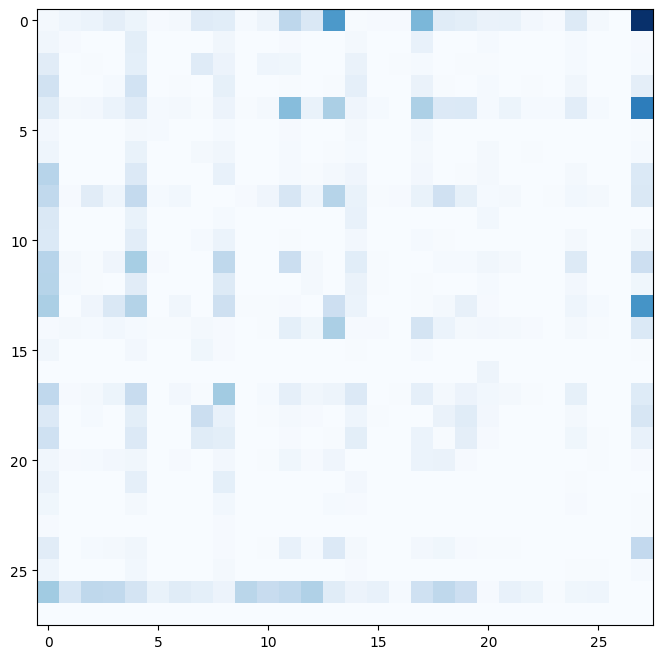

In [ ]:
# plot to view
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(8, 8))
plt.imshow(N, cmap='Blues')

In [ ]:
int_to_charecter = {i:ch for ch, i in charecter_to_int.items()}

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

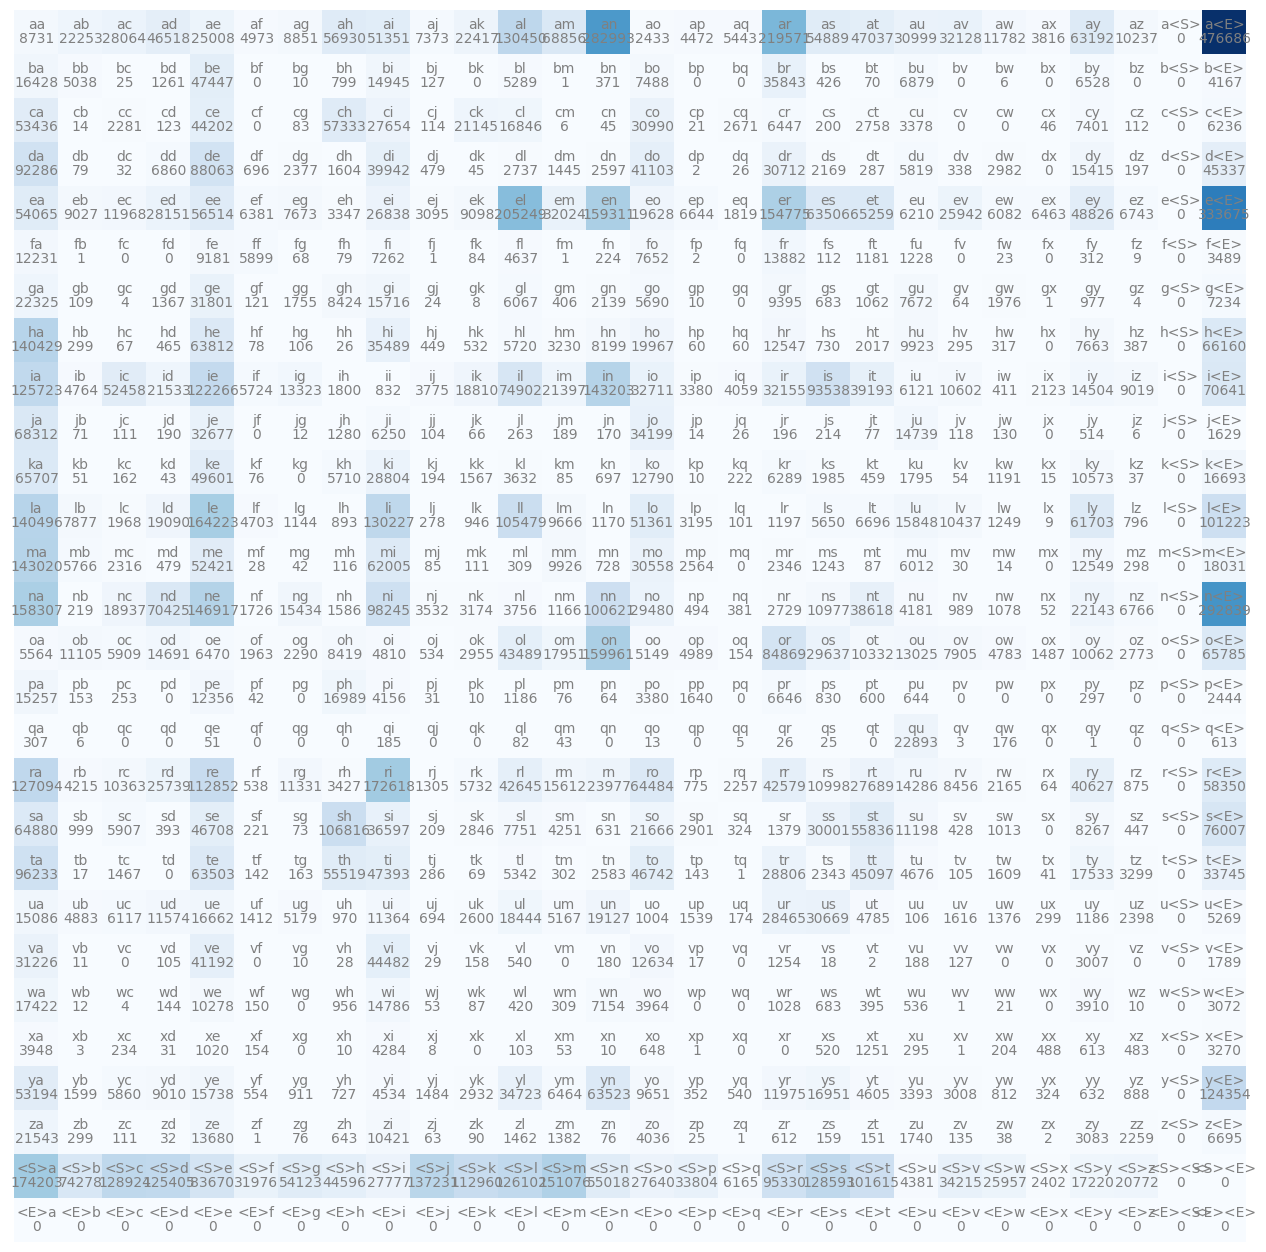

In [ ]:
# Visualise
plt.figure(figsize=(16, 16))
plt.imshow(N, cmap='Blues')
for i in range(28):
    for j in range(28):
        chstr = int_to_charecter[i] + int_to_charecter[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off')


Minor changings:

- '<S'> etc are just conventions in NLP, we will use single **.** for S and E.
- vocan will start from 1 and 0 will be for .

In [ ]:
N = torch.zeros((27, 27), dtype=torch.int32)

In [ ]:
# Embeddings
vocab = sorted(list(set(''.join(words))))
charecter_to_int = {ch:i+1 for i,ch in enumerate(vocab)}
charecter_to_int['.'] = 0

# 0-27 =28


In [ ]:
charecter_to_int

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26,
 '.': 0}

In [ ]:
# Covert back to integer
int_to_charecter = {i:ch for ch, i in charecter_to_int.items()}

In [ ]:
int_to_charecter

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

In [ ]:
# Store in N
for w in words:
  chs = ['.'] + list(w) + ['.'] # words will become [<S>word<E>]
  for ch1, ch2 in zip(chs, chs[1:]):
      ind_ch1 = charecter_to_int[ch1]
      ind_ch2 = charecter_to_int[ch2]
      N[ind_ch1, ind_ch2] += 1

In [ ]:
N.shape

torch.Size([27, 27])

(np.float64(-0.5), np.float64(26.5), np.float64(26.5), np.float64(-0.5))

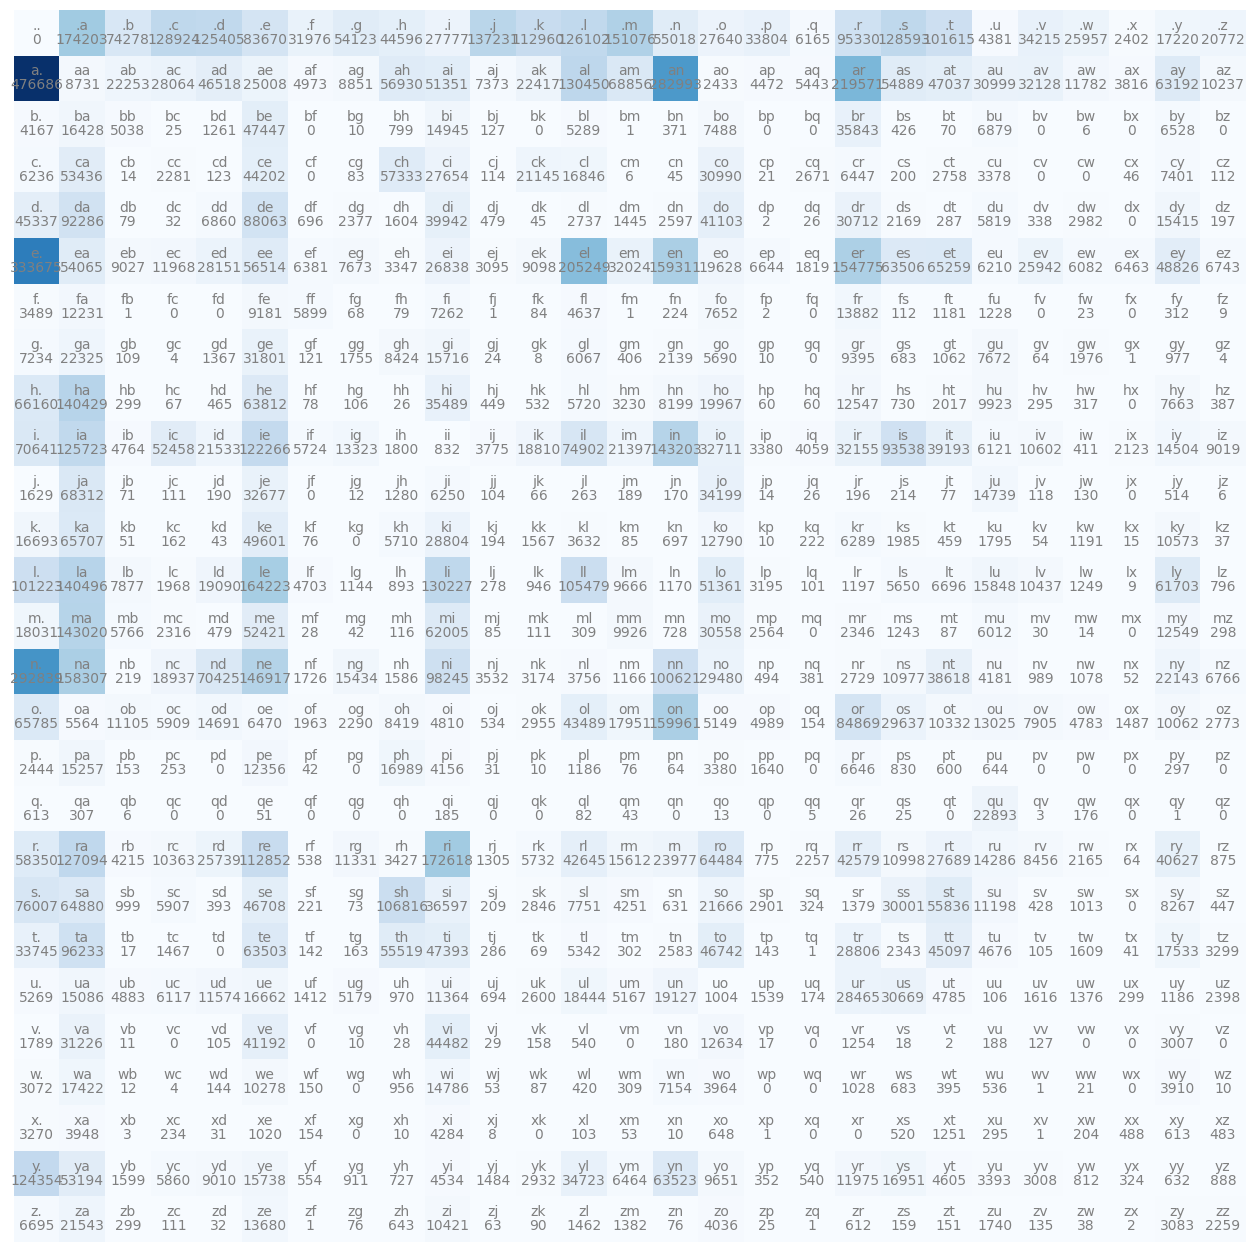

In [ ]:
# Visualise
plt.figure(figsize=(16, 16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = int_to_charecter[i] + int_to_charecter[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off')

# Predictiong a word.

We shall use the probability to predict a word. Below is script which will sample a charecter based on the probability which we shall generate using torch.multinomial then this will provide an index of the charecter which can be cross refrenced to the lookup table or embeddigns table which we have made earlier.

In [ ]:
p = N[0].float()
# Probability
p = p / p.sum()
p

tensor([0.0000, 0.0954, 0.0407, 0.0706, 0.0687, 0.0458, 0.0175, 0.0296, 0.0244,
        0.0152, 0.0752, 0.0619, 0.0691, 0.0828, 0.0301, 0.0151, 0.0185, 0.0034,
        0.0522, 0.0704, 0.0557, 0.0024, 0.0187, 0.0142, 0.0013, 0.0094, 0.0114])

In [ ]:
g = torch.Generator().manual_seed(2147483647)
# torch.mul... takes probability vector and returns a index which is sampled
# from vector. e.g [.1, .3, .5] if sample is two [1, 2] may return as they are
# most frequent with .3 probability and .5 with 1 and 2 index respectively.
index = torch.multinomial(
  input=p,
  num_samples=1,
  replacement=True,
  generator=g
).item()


print("Index: ", index)
print("Charecter: ", int_to_charecter[index])

Index:  10
Charecter:  j


## Predicting a word based on probability of bigram.

- probability will be **p/sum(p)**

we shall generate bigram probability based charecter.

In [ ]:
# set seed for reproducibility.
g = torch.Generator().manual_seed(2147483647)

# initial index.
index = 0

# generate a charecters untill we find . which is end and it means word is completed.
while True:
  p = N[index].float()
  p = p / p.sum()
  index = torch.multinomial(
    input=p,
    num_samples=1,
    replacement=True,
    generator=g
  ).item()
  print(int_to_charecter[index], end='')
  if index == 0:
    break

junide.

In [ ]:
"""Generate more words to view how much accurate is this"""
g = torch.Generator().manual_seed(2147483647)
for i in range(100):
  out = []
  index = 0
  while True:
    p = N[index].float()
    p = p / p.sum()
    index = torch.multinomial(
      input=p,
      num_samples=1,
      replacement=True,
      generator=g
    ).item()
    out.append(int_to_charecter[index])
    if index == 0:
      break
  print(''.join(out))

junide.
janasar.
p.
clay.
a.
be.
kohin.
tolera.
juet.
kilanaduranileviackabyainrwieta.
ssty.
eaylarte.
ffrmumerifontume.
phynshenaruani.
core.
yaenon.
ja.
jandinerimikimaynin.
anadsn.
ssorionsushadgossmitta.
il.
le.
pann.
thatirtrreli.
isheyner.
mmelumemahaune.
ha.
ch.
cararr.
jenh.
anarta.
maly.
shal.
hisi.
lavaronilihemieleawath.
b.
sela.
tavelitikiesaloeverin.
ndewafabushela.
anteariawi.
jon.
odridrdwnanialilpergha.
tezralelia.
vywheelvan.
hia.
shahacellette.
tossaryonialienaia.
erenn.
ja.
carda.
rn.
chemankesorannje.
sa.
rtan.
kyn.
deriganannidabevidon.
bassttattily.
us.
dasa.
lertth.
codorerlasposhatal.
londes.
dfanna.
m.
m.
shana.
ve.
hannge.
jardienivien.
usien.
ja.
jenal.
feth.
chrarelanaylialeohanorrriyl.
rrstirevertitarkannja.
neriadadel.
l.
ciciatava.
sel.
shirla.
s.
joue.
lialieri.
onzinerarbihisisaubiarleorvannadetza.
az.
arilertaliamadayrausbalodo.
meyton.
za.
sarran.
han.
ke.
etametteronakin.
larastan.
tisonanisemynelewis.
de.
rckareka.
jojagerie.
fianesichaylull.
juses.

This is surely not good at all.

## Generate words using uniform probability distribution.

In [ ]:
"""Words with uniform distribution"""
g = torch.Generator().manual_seed(2147483647)


for i in range(10):
  out = []
  index = 0
  while True:

    # uniform probaility distribution
    p = torch.ones(27) / 27

    index = torch.multinomial(
      input=p,
      num_samples=1,
      replacement=True,
      generator=g
    ).item()
    out.append(int_to_charecter[index])
    if index == 0:
      break
  print(''.join(out))


juwjdvdipkcqaz.
p.
cfqywocnzqfjiirltozcogsjgwzvudlhnpauyjbilevhajkdbduinrwibtlzsnjyievyvaftbzffvmumthyfodtumjrpfytszwjhrjagq.
coreaysezocfkyjjabdywejfmoifmwyfinwagaasnhsvfihofszxhddgosfmptpagicz.
rjpiufmthdt.
rkrrsru.
iyumuyfy.
mjekujcbkhvupwyhvpvhvccragr.
wdkhwfdztta.
mplyisbxlyhuuiqzavmpocbzthqmimvyqwat.


This is garbage.

**A little about tensor shapes.**

In [ ]:
import torch

In [ ]:
x = torch.tensor([[1, 2, 3],
                  [4, 5, 6]])

In [ ]:
print("x is: ", x)
print("x shape is: ", x.shape)

x is:  tensor([[1, 2, 3],
        [4, 5, 6]])
x shape is:  torch.Size([2, 3])


**dim=1 means row wise sum.**

1)- Keep dimension = False

In [ ]:
# Sum over dim=1 (rows), without keeping dimension:
sum1 = x.sum(dim=1, keepdim=False)

print("sum of x is ", sum1)        # single vector now rows no columns.
print("sum of x shape is ", sum1.shape)

sum of x is  tensor([ 6, 15])
sum of x shape is  torch.Size([2])


2)- Keep dimension = True

In [ ]:
# Sum over dim=1 (rows), without keeping dimension:
sum1 = x.sum(dim=1, keepdim=True)

print("sum of x is ", sum1)        # 2 rows and one column.
print("sum of x shape is ", sum1.shape)

sum of x is  tensor([[ 6],
        [15]])
sum of x shape is  torch.Size([2, 1])


**dim=0 means column wise sum.**

In [ ]:
# Sum over dim=1 (rows), without keeping dimension:
sum1 = x.sum(dim=0, keepdim=False)

print("sum of x is ", sum1)        # one element single vector no rows no columns.
print("sum of x shape is ", sum1.shape)

sum of x is  tensor([5, 7, 9])
sum of x shape is  torch.Size([3])


In [ ]:
# Sum over dim=1 (rows), without keeping dimension:
sum1 = x.sum(dim=0, keepdim=True)

print("sum of x is ", sum1)        # 2D metrice of [1, 3] one row, 3 columns.
print("sum of x shape is ", sum1.shape)

sum of x is  tensor([[5, 7, 9]])
sum of x shape is  torch.Size([1, 3])


## Taking into account whole N probability.

In [ ]:
P=N.float()

In [ ]:
P.sum()

tensor(13095831.)

In [ ]:
P.shape

torch.Size([27, 27])

This creates a only one value of whole data.

But we want in parallel, all the rows with their respective sums.

In [ ]:
P.sum(dim=1, keepdim=False)

tensor([1825433., 1727453.,  153148.,  283542.,  383629., 1358313.,   67558.,
         125034.,  379027.,  928967.,  161557.,  208442.,  847625.,  351084.,
        1034772.,  527061.,   67054.,   24429.,  831053.,  487749.,  457159.,
         198165.,  136997.,   65395.,   17632.,  378738.,   68815.])

In [ ]:
P=N.float()
P = P/P.sum(dim=1, keepdim=True)
g = torch.Generator().manual_seed(2147483647)

for i in range(10):
  out = []
  index = 0
  while True:
    p = P[index]
    index = torch.multinomial(
      input=p,
      num_samples=1,
      replacement=True,
      generator=g
    ).item()
    out.append(int_to_charecter[index])
    if index == 0:
      break
  print(''.join(out))


junide.
janasar.
p.
clay.
a.
be.
kohin.
tolera.
juet.
kilanaduranileviackabyainrwieta.


In [ ]:
P.shape

torch.Size([27, 27])

**Now, lets take an example where shape will be shame 27,27 but calculations will not be good.**

In [ ]:
P=N.float()
P = P/P.sum(1)    ##### We changed dimmension thats why.
# fill na
P = P.nan_to_num(0) # Just did for some values which are nan due to calculation
g = torch.Generator().manual_seed(2147483647)

for i in range(10):
  out = []
  index = 0
  while True:
    p = P[index]
    index = torch.multinomial(
      input=p,
      num_samples=1,
      replacement=True,
      generator=g
    ).item()
    out.append(int_to_charecter[index])
    if index == 0:
      break
  print(''.join(out))


juwidedilyaquzophufffobinza.
juinttophoushuwevisahniauzabbbeviackwedainrwiqulvinjuicaylarthofffudorryfodoumprpppasuwaqusaziqufffaysezockay.
jabiquerimoufffynin.
wicasthavobususuxwfogossmphaugicugriphufothotortyrmou.
ishefysh.
mmexujemahudywyavevavickarr.
wenhufforta.
mpphisbulyuzuiquduwoockazhemimayqwathub.
sexwhophelphikyzzaloevevinushewaffrushelphantexxwixx.
jozzodridrdwnonialilpprghaxtezzzzuciquvywhqugvavioshosbbhaufffftthwissstoboniupexxxippetewngggucchyacqucquvinnkwavizzmprdrydomafffttorepiguzzzzodabyviughwiaxittrttilybusthasucequtthlyndfrdwonzpphaltalveondwal.


In [ ]:
P.shape

torch.Size([27, 27])

# Getting start with evaluation.

In [ ]:
# Our probability table
P = N.float()
P = P/P.sum(dim=1, keepdim=True)

We have these bigram.

In [ ]:
for w in words[:3]:
  chs = ['.'] + list(w) + ['.'] # words will become [<S>word<E>]
  for ch1, ch2 in zip(chs, chs[1:]):
      ind_ch1 = charecter_to_int[ch1]
      ind_ch2 = charecter_to_int[ch2]
      print(f"{ch1}{ch2}")

.m
ma
ar
ry
y.
.a
an
nn
na
a.
.e
em
mm
ma
a.


So, the probability is..

In [ ]:
for w in words[:3]:
  chs = ['.'] + list(w) + ['.'] # words will become [<S>word<E>]
  for ch1, ch2 in zip(chs, chs[1:]):
      ind_ch1 = charecter_to_int[ch1]
      ind_ch2 = charecter_to_int[ch2]
      prob = P[ind_ch1, ind_ch2]
      print(f"Bigram: {ch1}{ch2}  it has Probability: {prob:.4f}")

Bigram: .m  it has Probability: 0.0828
Bigram: ma  it has Probability: 0.4074
Bigram: ar  it has Probability: 0.1271
Bigram: ry  it has Probability: 0.0489
Bigram: y.  it has Probability: 0.3283
Bigram: .a  it has Probability: 0.0954
Bigram: an  it has Probability: 0.1638
Bigram: nn  it has Probability: 0.0972
Bigram: na  it has Probability: 0.1530
Bigram: a.  it has Probability: 0.2759
Bigram: .e  it has Probability: 0.0458
Bigram: em  it has Probability: 0.0236
Bigram: mm  it has Probability: 0.0283
Bigram: ma  it has Probability: 0.4074
Bigram: a.  it has Probability: 0.2759


How this?


- We have a table of bigrams, with their counts.
- Then we calculate their probability:
- P = P.float(); P = P/P.sum()
- So, the same table became a probability table for the bigrams.
- In the previous script, we extracted as P[first char, second char] -> bigram probability. eg Probability of P[".","m"]

**Now we need to summarize this probabilities.**
These are probabilities we can check which bigram has good probability which is better. But its for our understanding only.

We will take log(prob) to summarize it.

In [ ]:
for w in words[:3]:
  chs = ['.'] + list(w) + ['.'] # words will become [<S>word<E>]
  for ch1, ch2 in zip(chs, chs[1:]):
      ind_ch1 = charecter_to_int[ch1]
      ind_ch2 = charecter_to_int[ch2]
      prob = P[ind_ch1, ind_ch2]
      print(f"Bigram: {ch1}{ch2}  it has Probability: {prob:.4f} with log prob: {prob.log():.4f}")

Bigram: .m  it has Probability: 0.0828 with log prob: -2.4918
Bigram: ma  it has Probability: 0.4074 with log prob: -0.8980
Bigram: ar  it has Probability: 0.1271 with log prob: -2.0627
Bigram: ry  it has Probability: 0.0489 with log prob: -3.0183
Bigram: y.  it has Probability: 0.3283 with log prob: -1.1137
Bigram: .a  it has Probability: 0.0954 with log prob: -2.3494
Bigram: an  it has Probability: 0.1638 with log prob: -1.8090
Bigram: nn  it has Probability: 0.0972 with log prob: -2.3306
Bigram: na  it has Probability: 0.1530 with log prob: -1.8774
Bigram: a.  it has Probability: 0.2759 with log prob: -1.2875
Bigram: .e  it has Probability: 0.0458 with log prob: -3.0827
Bigram: em  it has Probability: 0.0236 with log prob: -3.7475
Bigram: mm  it has Probability: 0.0283 with log prob: -3.5659
Bigram: ma  it has Probability: 0.4074 with log prob: -0.8980
Bigram: a.  it has Probability: 0.2759 with log prob: -1.2875


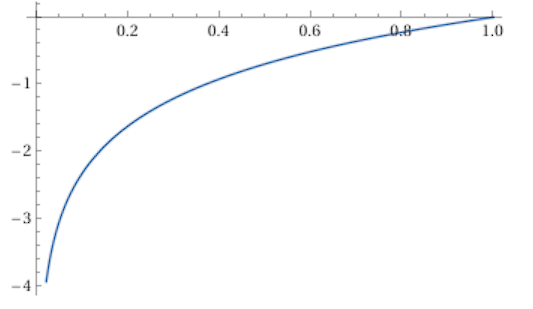

It is graph of **log(x) where x ranges 0 to 1**

We will have probabilities 0 to 1, so its graph will look like this. The positive the number or less negative the number the better the model.

negative log = lower probability

We can tak sum of log as log likelyhood to get a single number.

In [ ]:
log_likelyhood = 0.0
for w in words[:3]:
  chs = ['.'] + list(w) + ['.'] # words will become [<S>word<E>]
  for ch1, ch2 in zip(chs, chs[1:]):
      ind_ch1 = charecter_to_int[ch1]
      ind_ch2 = charecter_to_int[ch2]
      prob = P[ind_ch1, ind_ch2]
      logprob = torch.log(prob)
      log_likelyhood += logprob
      print(f"Bigram: {ch1}{ch2}  it has Probability: {prob:.4f} with log prob: {logprob:.4f}")

print(f"Log likelyhood: {log_likelyhood}")

Bigram: .m  it has Probability: 0.0828 with log prob: -2.4918
Bigram: ma  it has Probability: 0.4074 with log prob: -0.8980
Bigram: ar  it has Probability: 0.1271 with log prob: -2.0627
Bigram: ry  it has Probability: 0.0489 with log prob: -3.0183
Bigram: y.  it has Probability: 0.3283 with log prob: -1.1137
Bigram: .a  it has Probability: 0.0954 with log prob: -2.3494
Bigram: an  it has Probability: 0.1638 with log prob: -1.8090
Bigram: nn  it has Probability: 0.0972 with log prob: -2.3306
Bigram: na  it has Probability: 0.1530 with log prob: -1.8774
Bigram: a.  it has Probability: 0.2759 with log prob: -1.2875
Bigram: .e  it has Probability: 0.0458 with log prob: -3.0827
Bigram: em  it has Probability: 0.0236 with log prob: -3.7475
Bigram: mm  it has Probability: 0.0283 with log prob: -3.5659
Bigram: ma  it has Probability: 0.4074 with log prob: -0.8980
Bigram: a.  it has Probability: 0.2759 with log prob: -1.2875
Log likelyhood: -31.820043563842773


Lets take the log likely hood of whole dataset.

In [ ]:
log_likelyhood = 0.0
for w in words:
  chs = ['.'] + list(w) + ['.'] # words will become [<S>word<E>]
  for ch1, ch2 in zip(chs, chs[1:]):
      ind_ch1 = charecter_to_int[ch1]
      ind_ch2 = charecter_to_int[ch2]
      prob = P[ind_ch1, ind_ch2]
      logprob = torch.log(prob)
      log_likelyhood += logprob
      # print(f"Bigram: {ch1}{ch2}  it has Probability: {prob:.4f} with log prob: {logprob:.4f}")

print(f"Log likelyhood: {log_likelyhood}")

Log likelyhood: -32032388.0


Total log likelyhood is -2989333.0 the less it is the greater the model is.

A next work we can do is to take negative log so it will become positive, it will be easy to percieve that we are going to lowering a big number, also in neural network it will be great because we will be need to do estimation of loss.

In [ ]:
# negative log likelyhood.
neg_log_likelyhood = -log_likelyhood
print(f"Negative log likelyhood: {neg_log_likelyhood}")

Negative log likelyhood: 32032388.0


Now, we are going to reduce 2989333.0


It is a very nice loss  function because loss we can get is 0 and the higher is the bad it is.

**This negative log likelyhood is for whole dataset we can take average for covinence which will be good estimation of how well is our model on average.**

## Loss function for training

In [ ]:
log_likelyhood = 0.0

n = 0
for w in words:
  chs = ['.'] + list(w) + ['.'] # words will become [<S>word<E>]
  for ch1, ch2 in zip(chs, chs[1:]):
      ind_ch1 = charecter_to_int[ch1]
      ind_ch2 = charecter_to_int[ch2]
      prob = P[ind_ch1, ind_ch2]
      logprob = torch.log(prob)
      log_likelyhood += logprob
      n += 1
      # print(f"Bigram: {ch1}{ch2}  it has Probability: {prob:.4f} with log prob: {logprob:.4f}")

neg_log_likelyhood = -log_likelyhood

print(f"Log likelyhood: {log_likelyhood=}")
print(f"Negative log likelyhood: {neg_log_likelyhood=}")
print(f"Average Negative log likelyhood: {neg_log_likelyhood/n=}")

Log likelyhood: log_likelyhood=tensor(-32032388.)
Negative log likelyhood: neg_log_likelyhood=tensor(32032388.)
Average Negative log likelyhood: neg_log_likelyhood/n=tensor(2.4460)


Note: n and len(words) will not be same.

**Negative log likelyhood is our loss function,**

So 2.3825 is the loss function for training assigned by the model. It is the quality of model.

**Goal:** We will minimize this.

# Model Smoothing

Lets take loss function for just one word.

In [ ]:
log_likelyhood = 0.0

n = 0
for w in ['ahmad']:
  chs = ['.'] + list(w) + ['.'] # words will become [<S>word<E>]
  for ch1, ch2 in zip(chs, chs[1:]):
      ind_ch1 = charecter_to_int[ch1]
      ind_ch2 = charecter_to_int[ch2]
      prob = P[ind_ch1, ind_ch2]
      logprob = torch.log(prob)
      log_likelyhood += logprob
      n += 1
      print(f"Bigram: {ch1}{ch2}  it has Probability: {prob:.4f} with log prob: {logprob:.4f}")

neg_log_likelyhood = -log_likelyhood

print(f"Log likelyhood: {log_likelyhood=}")
print(f"Negative log likelyhood: {neg_log_likelyhood=}")
print(f"Average Negative log likelyhood: {neg_log_likelyhood/n=}")

Bigram: .a  it has Probability: 0.0954 with log prob: -2.3494
Bigram: ah  it has Probability: 0.0330 with log prob: -3.4126
Bigram: hm  it has Probability: 0.0085 with log prob: -4.7651
Bigram: ma  it has Probability: 0.4074 with log prob: -0.8980
Bigram: ad  it has Probability: 0.0269 with log prob: -3.6146
Bigram: d.  it has Probability: 0.1182 with log prob: -2.1356
Log likelyhood: log_likelyhood=tensor(-17.1752)
Negative log likelyhood: neg_log_likelyhood=tensor(17.1752)
Average Negative log likelyhood: neg_log_likelyhood/n=tensor(2.8625)


Or loss function is 3.0038.
Lets do some, ad j at the end of ahmad.

In [ ]:
log_likelyhood = 0.0

n = 0
for w in ['ahmadj']: # Added j at the end.
  chs = ['.'] + list(w) + ['.'] # words will become [<S>word<E>]
  for ch1, ch2 in zip(chs, chs[1:]):
      ind_ch1 = charecter_to_int[ch1]
      ind_ch2 = charecter_to_int[ch2]
      prob = P[ind_ch1, ind_ch2]
      logprob = torch.log(prob)
      log_likelyhood += logprob
      n += 1
      print(f"Bigram: {ch1}{ch2}  it has Probability: {prob:.4f} with log prob: {logprob:.4f}")

neg_log_likelyhood = -log_likelyhood

print(f"Log likelyhood: {log_likelyhood=}")
print(f"Negative log likelyhood: {neg_log_likelyhood=}")
print(f"Average Negative log likelyhood: {neg_log_likelyhood/n=}")

Bigram: .a  it has Probability: 0.0954 with log prob: -2.3494
Bigram: ah  it has Probability: 0.0330 with log prob: -3.4126
Bigram: hm  it has Probability: 0.0085 with log prob: -4.7651
Bigram: ma  it has Probability: 0.4074 with log prob: -0.8980
Bigram: ad  it has Probability: 0.0269 with log prob: -3.6146
Bigram: dj  it has Probability: 0.0012 with log prob: -6.6857
Bigram: j.  it has Probability: 0.0101 with log prob: -4.5969
Log likelyhood: log_likelyhood=tensor(-26.3223)
Negative log likelyhood: neg_log_likelyhood=tensor(26.3223)
Average Negative log likelyhood: neg_log_likelyhood/n=tensor(3.7603)


Now we can see neg log lilelyhood or **nnl** increased because *j.* is very uncommon.

**Lets do smoothing.**

In [ ]:
"""We will add + 1 to N it means N will be increased by one."""
P = (N+1).float()
P = P/P.sum(dim=1, keepdim=True)

log_likelyhood = 0.0

n = 0
for w in ['ahmadj']: # Added j at the end.
  chs = ['.'] + list(w) + ['.'] # words will become [<S>word<E>]
  for ch1, ch2 in zip(chs, chs[1:]):
      ind_ch1 = charecter_to_int[ch1]
      ind_ch2 = charecter_to_int[ch2]
      prob = P[ind_ch1, ind_ch2]
      logprob = torch.log(prob)
      log_likelyhood += logprob
      n += 1
      print(f"Bigram: {ch1}{ch2}  it has Probability: {prob:.4f} with log prob: {logprob:.4f}")

neg_log_likelyhood = -log_likelyhood

print(f"Log likelyhood: {log_likelyhood=}")
print(f"Negative log likelyhood: {neg_log_likelyhood=}")
print(f"Average Negative log likelyhood: {neg_log_likelyhood/n=}")

Bigram: .a  it has Probability: 0.0954 with log prob: -2.3494
Bigram: ah  it has Probability: 0.0330 with log prob: -3.4126
Bigram: hm  it has Probability: 0.0085 with log prob: -4.7649
Bigram: ma  it has Probability: 0.4073 with log prob: -0.8981
Bigram: ad  it has Probability: 0.0269 with log prob: -3.6146
Bigram: dj  it has Probability: 0.0013 with log prob: -6.6837
Bigram: j.  it has Probability: 0.0101 with log prob: -4.5964
Log likelyhood: log_likelyhood=tensor(-26.3197)
Negative log likelyhood: neg_log_likelyhood=tensor(26.3197)
Average Negative log likelyhood: neg_log_likelyhood/n=tensor(3.7600)


**We can clearly we nnl decreased by 0.1 as we did model smoothing by adding +1 in N. We can do +5 to smooth more or more etc.**

In [ ]:
"""We will add + 1 to N it means N will be increased by one."""
P = (N).float()
P = P/P.sum(dim=1, keepdim=True)

log_likelyhood = 0.0

n = 0
for w in ['ahmadj']: # Added j at the end.
  chs = ['.'] + list(w) + ['.'] # words will become [<S>word<E>]
  for ch1, ch2 in zip(chs, chs[1:]):
      ind_ch1 = charecter_to_int[ch1]
      ind_ch2 = charecter_to_int[ch2]
      prob = P[ind_ch1, ind_ch2]
      logprob = torch.log(prob)
      log_likelyhood += logprob
      n += 1
      print(f"Bigram: {ch1}{ch2}  it has Probability: {prob:.4f} with log prob: {logprob:.4f}")

neg_log_likelyhood = -log_likelyhood

print(f"Log likelyhood: {log_likelyhood=}")
print(f"Negative log likelyhood: {neg_log_likelyhood=}")
print(f"Average Negative log likelyhood: {neg_log_likelyhood/n=}")

Bigram: .a  it has Probability: 0.0954 with log prob: -2.3494
Bigram: ah  it has Probability: 0.0330 with log prob: -3.4126
Bigram: hm  it has Probability: 0.0085 with log prob: -4.7651
Bigram: ma  it has Probability: 0.4074 with log prob: -0.8980
Bigram: ad  it has Probability: 0.0269 with log prob: -3.6146
Bigram: dj  it has Probability: 0.0012 with log prob: -6.6857
Bigram: j.  it has Probability: 0.0101 with log prob: -4.5969
Log likelyhood: log_likelyhood=tensor(-26.3223)
Negative log likelyhood: neg_log_likelyhood=tensor(26.3223)
Average Negative log likelyhood: neg_log_likelyhood/n=tensor(3.7603)


Added +5 nl decreased by 0.4.

# Bigram charecter level language model

Structure
- Receive a charecter
- NN model will predict a distribution of probabilities for next chareecter in the sequence.

Decoding the problem:
- Input charecter e.g **a**
- Predict charecter e.g **b**

We can say a is **Label** and b is **Feature**.

So lets create this.

## Training set

In [ ]:
"""Training set of bigram (x, y), where x is input and we need to predict y."""
xs, ys = [], []  # xs = labels , yx = features

for w in words:
  chs = ['.'] + list(w) + ['.'] # words will become [<S>word<E>]
  for ch1, ch2 in zip(chs, chs[1:]):
      ind_ch1 = charecter_to_int[ch1]
      ind_ch2 = charecter_to_int[ch2]
      xs.append(ind_ch1)
      ys.append(ind_ch2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)

# If tensor is with T capital it makes data float.


Look at single example with one word how to do.

In [ ]:
"""Training set of bigram (x, y), where x is input and we need to predict y."""
xs, ys = [], []  # xs = labels , yx = features

for w in words[:1]:
  chs = ['.'] + list(w) + ['.'] # words will become [<S>word<E>]
  for ch1, ch2 in zip(chs, chs[1:]):
      ind_ch1 = charecter_to_int[ch1]
      ind_ch2 = charecter_to_int[ch2]
      print(ch1, ch2)
      xs.append(ind_ch1)
      ys.append(ind_ch2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)

. m
m a
a r
r y
y .


We have 5 examples for neural network.

In [ ]:
xs

tensor([ 0, 13,  1, 18, 25])

In [ ]:
ys

tensor([13,  1, 18, 25,  0])

Now, we have 27 options from which we can decide. We need to encode this data to make available for neyral network.

For this purpose we will use **one hot encoding**.

In [ ]:
import torch.nn.functional as F

In [ ]:
xenc = F.one_hot(xs, num_classes=27).float()

In [ ]:
yenc = F.one_hot(xs, num_classes=27).float()

In [ ]:
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 1., 0.]])

Because most neural network layers (like linear layers, convolutions, etc.) and loss functions (e.g., cross-entropy, MSE) expect **floating-point** inputs. Trying to pass integer tensors through them often leads to errors or unintended behavior.

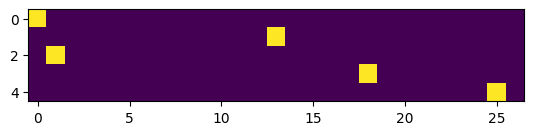

In [ ]:
plt.imshow(xenc)

In [ ]:
print("Shape:", xenc.shape)
print("Type:", xenc.dtype)

Shape: torch.Size([5, 27])
Type: torch.float32


Above image shows which word is encode at which position.

**What is Neural Network?**

a = W.x + b


- x is xenc

Now we need to create W and b

In [ ]:
W = torch.randn((27, 27))

In [ ]:
xenc @ W

tensor([[-0.7212,  0.4227,  0.5255, -0.2621, -0.2598,  1.6095, -0.2407, -1.4348,
          1.6260, -0.3631,  0.2885, -0.5082,  2.1169, -0.1612, -0.3018,  0.9630,
         -0.9513,  0.3013, -0.4991, -1.0271,  0.0380,  0.1005,  0.3388,  0.6585,
         -0.1366, -0.2941, -0.2397],
        [ 0.4624,  1.2676, -0.6216, -0.3981, -0.3713, -1.8108, -0.3560, -0.7272,
         -0.0517,  0.0338, -1.3433,  0.2061, -0.1368,  0.9982,  0.4505,  0.3891,
         -0.8508,  0.3419, -0.7063, -0.2771,  1.9759, -1.4866,  1.7240, -0.6821,
         -1.4752, -1.1440,  0.2159],
        [-0.4716, -1.1359, -0.8106, -0.6409, -0.1722,  1.8332,  1.4520, -1.9225,
         -0.0400, -0.1520, -0.2543,  1.1111,  2.3443,  0.6543,  1.3726, -1.0204,
         -1.8958, -1.7310, -1.2594,  0.9803,  0.7142, -1.7690,  1.2935, -0.9392,
          0.4431,  0.2839,  0.5130],
        [-0.0098,  0.0958,  0.0452,  0.5261, -0.9897, -0.9767, -3.0456,  0.7582,
          0.6454, -0.8518, -1.8712,  0.6647,  0.0404, -0.6757,  0.0647, -1.9779

xenc @ W is the firing rate between let say (xenc @ W)[3, 13] then 3 and 13.

- All of this data xenc @ W can be interpreted as log counts or we may say logits.
- We can take exp() of this to get back counts which will be equilent to N

In [ ]:
logits = xenc @ W # log counts
counts = logits.exp() # counts, equivalent to N

Now, take the probability to look at which charecter may come next.

In [ ]:
prob = counts / counts.sum(dim=1, keepdim=True)
prob

tensor([[0.0116, 0.0363, 0.0402, 0.0183, 0.0183, 0.1188, 0.0187, 0.0057, 0.1208,
         0.0165, 0.0317, 0.0143, 0.1973, 0.0202, 0.0176, 0.0622, 0.0092, 0.0321,
         0.0144, 0.0085, 0.0247, 0.0263, 0.0333, 0.0459, 0.0207, 0.0177, 0.0187],
        [0.0430, 0.0962, 0.0145, 0.0182, 0.0187, 0.0044, 0.0190, 0.0131, 0.0257,
         0.0280, 0.0071, 0.0333, 0.0236, 0.0735, 0.0425, 0.0400, 0.0116, 0.0381,
         0.0134, 0.0205, 0.1954, 0.0061, 0.1519, 0.0137, 0.0062, 0.0086, 0.0336],
        [0.0125, 0.0064, 0.0089, 0.0106, 0.0169, 0.1256, 0.0858, 0.0029, 0.0193,
         0.0172, 0.0156, 0.0610, 0.2094, 0.0386, 0.0792, 0.0072, 0.0030, 0.0036,
         0.0057, 0.0535, 0.0410, 0.0034, 0.0732, 0.0079, 0.0313, 0.0267, 0.0335],
        [0.0356, 0.0396, 0.0376, 0.0608, 0.0134, 0.0135, 0.0017, 0.0767, 0.0686,
         0.0153, 0.0055, 0.0699, 0.0374, 0.0183, 0.0384, 0.0050, 0.1362, 0.0510,
         0.1025, 0.0280, 0.0341, 0.0396, 0.0061, 0.0141, 0.0077, 0.0098, 0.0335],
        [0.1024, 0.0069,

In [ ]:
prob.shape

torch.Size([5, 27])

In each 5 training examples each x has 27 possibilities of charecters which may come next.

These are all of the probabilities showing the probability of words which may come next. Lets interprest for **.**

In [ ]:
prob[0]

tensor([0.0116, 0.0363, 0.0402, 0.0183, 0.0183, 0.1188, 0.0187, 0.0057, 0.1208,
        0.0165, 0.0317, 0.0143, 0.1973, 0.0202, 0.0176, 0.0622, 0.0092, 0.0321,
        0.0144, 0.0085, 0.0247, 0.0263, 0.0333, 0.0459, 0.0207, 0.0177, 0.0187])

prob[0] is the set of probabilities showing which charecter may come next to the . They are all of the possibilities.

In [ ]:
max(prob[0])

tensor(0.1973)

**Goal:** optimise W in such a way that the 27 probabilities for each charecter of input will be most good.

And the thing we did at last is softmax :) counts and probabilities.

## Backpropogation

In [ ]:
nlls = torch.zeros(5)
for i in range(5):
  # i-th bigram:
  x = xs[i].item() # input charecter index
  y = ys[i].item() # label

  print("--------")
  print(f"Bigram example {i+1}: {int_to_charecter[x]} {int_to_charecter[y]} (indexes {x}, {y})")
  print("input to the neural net:", x)
  print("output probabilities from the neural net:", prob[i])
  print("label (actual next charecter):", y)

  p = prob[i, y]
  print("probability assigned by the net to the the correct charecter:", p.item())
  logp = torch.log(p)
  print("log likelihood:", logp.item())

  nll = -logp
  print("negative log likelihood:", nll.item())
  nlls[i] = nll

print("=====> Average negative log likelihood, i.e. loss = ", nlls.mean().item())

--------
Bigram example 1: . m (indexes 0, 13)
input to the neural net: 0
output probabilities from the neural net: tensor([0.0116, 0.0363, 0.0402, 0.0183, 0.0183, 0.1188, 0.0187, 0.0057, 0.1208,
        0.0165, 0.0317, 0.0143, 0.1973, 0.0202, 0.0176, 0.0622, 0.0092, 0.0321,
        0.0144, 0.0085, 0.0247, 0.0263, 0.0333, 0.0459, 0.0207, 0.0177, 0.0187])
label (actual next charecter): 13
probability assigned by the net to the the correct charecter: 0.020224381238222122
log likelihood: -3.9008665084838867
negative log likelihood: 3.9008665084838867
--------
Bigram example 2: m a (indexes 13, 1)
input to the neural net: 13
output probabilities from the neural net: tensor([0.0430, 0.0962, 0.0145, 0.0182, 0.0187, 0.0044, 0.0190, 0.0131, 0.0257,
        0.0280, 0.0071, 0.0333, 0.0236, 0.0735, 0.0425, 0.0400, 0.0116, 0.0381,
        0.0134, 0.0205, 0.1954, 0.0061, 0.1519, 0.0137, 0.0062, 0.0086, 0.0336])
label (actual next charecter): 1
probability assigned by the net to the the correct char

Above code shows a bigram with their next charecter probabilities, then it shoes what is actual next charecter with its probability. High loss shows that the model assigned not good probability to the next charecter.


If we change weights metrice it would be better. Thats why we need backpropogation to find optimal weights.

**Back propogation**

- Step 1: forward pass.
- Step 2: backward pass calculate loss.
- step 3: update weights.

We have did forward pass, now we will use loss function to do backward pass.

In [ ]:
"""
For the loss of first get the actual probabilities,
then take its negative log.

Now we need to get probabilities of y from probs.
"""

prob[torch.arange(5), ys]

tensor([0.0202, 0.0962, 0.0057, 0.0098, 0.1024])

In [ ]:
loss = -prob[torch.arange(5), ys].log().mean()    #prob is the model predicted probabilities for next charecters.
loss

tensor(3.6625)

This is our loss funtion and same to previous we calculated but efficient.

In [ ]:
# Initialize weights
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

In [ ]:
# forward pass
xenc = F.one_hot(xs, num_classes=27).float()
logits = xenc @ W # log counts
counts = logits.exp() # counts, equivalent to N
prob = counts / counts.sum(dim=1, keepdim=True)
loss = -prob[torch.arange(5), ys].log().mean()

In [ ]:
loss

tensor(3.4628, grad_fn=<NegBackward0>)

In [ ]:
# backward pass
W.grad = None
loss.backward()

In [ ]:
# Update
W.data += -0.1 * W.grad #  0.1 is eta or learning rate.

Each time we will do forward, backward and update loss will dcrease. Lets put it into the loop.

In [ ]:
"""Training set of bigram (x, y), where x is input and we need to predict y."""
xs, ys = [], []  # xs = labels , yx = features

for w in words:
  chs = ['.'] + list(w) + ['.'] # words will become [<S>word<E>]
  for ch1, ch2 in zip(chs, chs[1:]):
      ind_ch1 = charecter_to_int[ch1]
      ind_ch2 = charecter_to_int[ch2]
      xs.append(ind_ch1)
      ys.append(ind_ch2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)

num = xs.nelement()

print("Total Elements: ", num)

Total Elements:  13095831


In [ ]:
# Weights
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

In [ ]:
for i in range(100):

  # forward pass
  xenc = F.one_hot(xs, num_classes=27).float()
  logits = xenc @ W # log counts
  counts = logits.exp() # counts, equivalent to N
  prob = counts / counts.sum(dim=1, keepdim=True)

  # Loss
  loss = -prob[torch.arange(num), ys].log().mean()
  print("Loss: ", loss.item())

  # backward pass
  W.grad = None
  loss.backward()

  # Update
  W.data += -20 * W.grad #  0.1 is eta or learning rate.

Loss:  3.785564422607422


**Regurlisation:** tries to minimise W to get a more uniform weights.

In [ ]:
# Gradient descent
for i in range(100):

  # forward pass
  xenc = F.one_hot(xs, num_classes=27).float()
  logits = xenc @ W # log counts
  counts = logits.exp() # counts, equivalent to N
  prob = counts / counts.sum(dim=1, keepdim=True)

  # Loss
  loss = -prob[torch.arange(num), ys].log().mean() + 1*(W**2).mean() # REGURLIZATION

  # backward pass
  W.grad = None
  loss.backward()

  # Update
  W.data += -20 * W.grad #  0.1 is eta or learning rate.

print("Loss: ", loss.item())

## Sampling from Model

In [ ]:
# Sampling
g = torch.Generator().manual_seed(2147483647)

for i in range(10):
  out = []
  index = 0 # .
  while True:
    # P
    xenc = F.one_hot(torch.tensor([index]), num_classes=27).float()
    logits = xenc @ W # log counts
    counts = logits.exp() # counts, equivalent to N
    p = counts / counts.sum(dim=1, keepdim=True)

    # Index
    index = torch.multinomial(
      input=p,
      num_samples=1,
      replacement=True,
      generator=g
    ).item()
    out.append(int_to_charecter[index])
    if index == 0:
      break
  print(''.join(out))


NameError: name 'torch' is not defined

The results are same as when we take into account who distribution table. Our model is identical but different.

**Problem:**

- The predictions are not very good because it takes only one charecter of context.
- If we add more context to the sequence things will quickly blow up, size of table will become larger and larger.

# Multi Layer Perceptrone MLP

In [ ]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
words[:10]

['mary',
 'anna',
 'emma',
 'elizabeth',
 'minnie',
 'margaret',
 'ida',
 'alice',
 'bertha',
 'sarah']

In [ ]:
len(words)

357765

In [ ]:
# Vocabulary
chars = sorted(list(set(''.join(words))))
str_to_ind = {s:i+1 for i,s in enumerate(chars)}
str_to_ind['.'] = 0
ind_to_str = {i:s for s,i in str_to_ind.items()}

In [ ]:
ind_to_str

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

## Dataset for MLP

We are going to:

- Get 3 words at time and predict next based on this.


In [ ]:
# dataset.

block_size = 3
xs, ys = [], []  # xs = labels , yx = features

for w in words[:5]:

  """
  First time:
  add block 000 to xs
  ix means m to ys

  means ... ----> m
  ... is padded token

  Next m is now x because it is predicted, so:
  add ix as m in block 00ix which is ..m add in xs
  then next ix = to a add it to y.

  Next a will become xs and so on....
  """

  print(w)
  context = [0]*block_size
  for ch in w + '.':
    ix = str_to_ind[ch] # get embed of char
    xs.append(context) # Add context to xs
    ys.append(ix) # Add index to ys.
    print(''.join(ind_to_str[i] for i in context), '--->', ch)
    context = context[1:] + [ix] # crop and append

# xs = torch.tensor(xs)
# ys = torch.tensor(ys)



mary
... ---> m
..m ---> a
.ma ---> r
mar ---> y
ary ---> .
anna
... ---> a
..a ---> n
.an ---> n
ann ---> a
nna ---> .
emma
... ---> e
..e ---> m
.em ---> m
emm ---> a
mma ---> .
elizabeth
... ---> e
..e ---> l
.el ---> i
eli ---> z
liz ---> a
iza ---> b
zab ---> e
abe ---> t
bet ---> h
eth ---> .
minnie
... ---> m
..m ---> i
.mi ---> n
min ---> n
inn ---> i
nni ---> e
nie ---> .


In [ ]:
xs

[[0, 0, 0],
 [0, 0, 13],
 [0, 13, 1],
 [13, 1, 18],
 [1, 18, 25],
 [0, 0, 0],
 [0, 0, 1],
 [0, 1, 14],
 [1, 14, 14],
 [14, 14, 1],
 [0, 0, 0],
 [0, 0, 5],
 [0, 5, 13],
 [5, 13, 13],
 [13, 13, 1],
 [0, 0, 0],
 [0, 0, 5],
 [0, 5, 12],
 [5, 12, 9],
 [12, 9, 26],
 [9, 26, 1],
 [26, 1, 2],
 [1, 2, 5],
 [2, 5, 20],
 [5, 20, 8],
 [0, 0, 0],
 [0, 0, 13],
 [0, 13, 9],
 [13, 9, 14],
 [9, 14, 14],
 [14, 14, 9],
 [14, 9, 5]]

We can change block size as needed.

In [ ]:
# dataset.

block_size = 10
xs, ys = [], []  # xs = labels , yx = features

for w in words[:5]:

  print(w)
  context = [0]*block_size
  for ch in w + '.':
    ix = str_to_ind[ch] # get embed of char
    xs.append(context) # Add context to xs
    ys.append(ix) # Add index to ys.
    print(''.join(ind_to_str[i] for i in context), '--->', ch)
    context = context[1:] + [ix] # crop and append

# xs = torch.tensor(xs)
# ys = torch.tensor(ys)



mary
.......... ---> m
.........m ---> a
........ma ---> r
.......mar ---> y
......mary ---> .
anna
.......... ---> a
.........a ---> n
........an ---> n
.......ann ---> a
......anna ---> .
emma
.......... ---> e
.........e ---> m
........em ---> m
.......emm ---> a
......emma ---> .
elizabeth
.......... ---> e
.........e ---> l
........el ---> i
.......eli ---> z
......eliz ---> a
.....eliza ---> b
....elizab ---> e
...elizabe ---> t
..elizabet ---> h
.elizabeth ---> .
minnie
.......... ---> m
.........m ---> i
........mi ---> n
.......min ---> n
......minn ---> i
.....minni ---> e
....minnie ---> .


But we are going with 3 only.

Lets get start with block size 3 and 5 words as an example.

In [ ]:
# dataset.

block_size = 3
X, Y = [], []  # X = labels , Y = features

for w in words[:5]:
  context = [0]*block_size
  for ch in w + '.':
    ix = str_to_ind[ch] # get embed of char
    X.append(context) # Add context to xs
    Y.append(ix) # Add index to ys.
    context = context[1:] + [ix] # crop and append

X = torch.tensor(X)
Y = torch.tensor(Y)

In [ ]:
X.shape, Y.shape

(torch.Size([32, 3]), torch.Size([32]))

We have 32 examples and having 3 columns.

In [ ]:
X[0]

tensor([0, 0, 0])

From 32 examples at index 0 we have ... and each dot is stored in a single column representing embeding of this charecter, at this time .

In [ ]:
X

tensor([[ 0,  0,  0],
        [ 0,  0, 13],
        [ 0, 13,  1],
        [13,  1, 18],
        [ 1, 18, 25],
        [ 0,  0,  0],
        [ 0,  0,  1],
        [ 0,  1, 14],
        [ 1, 14, 14],
        [14, 14,  1],
        [ 0,  0,  0],
        [ 0,  0,  5],
        [ 0,  5, 13],
        [ 5, 13, 13],
        [13, 13,  1],
        [ 0,  0,  0],
        [ 0,  0,  5],
        [ 0,  5, 12],
        [ 5, 12,  9],
        [12,  9, 26],
        [ 9, 26,  1],
        [26,  1,  2],
        [ 1,  2,  5],
        [ 2,  5, 20],
        [ 5, 20,  8],
        [ 0,  0,  0],
        [ 0,  0, 13],
        [ 0, 13,  9],
        [13,  9, 14],
        [ 9, 14, 14],
        [14, 14,  9],
        [14,  9,  5]])

## Embedding table

In [ ]:
# Initialising embeddings embed them in lower dimmensional space.
C = torch.randn((27, 2))

We have initialised embeddings and these embedings will be trainined in a way to predict the next charecter.

In [ ]:
C[5]

tensor([-1.2661, -0.8345])

In the previous bigram model we used encoding and this is equal to the previous model.

In [ ]:
F.one_hot(torch.tensor(5), num_classes=27).float() @ C

tensor([-1.2661, -0.8345])

This is same. So we are going with look up table C.

In [ ]:
X[1]

tensor([ 0,  0, 13])

X at index 1 has embedings 0,0,13, we can use them to find corresponding in C.

In [ ]:
C[X][1]

tensor([[-0.3532,  1.5676],
        [-0.3532,  1.5676],
        [-1.2365, -0.9779]])

In [ ]:
# or for one element
C[X][1, 0]

tensor([ 0.9369, -0.0350])

**So Our embedings for are:**

In [ ]:
emb = C[X]
emb.shape

torch.Size([32, 3, 2])

Note: X is the tensor of embedings of charecters with block size 3;

whereas, C is the embedings we will train to find results.

## Weights

We have started with a space of (27, 2) then used this tale C to embed X. Now we have a size of 32, 3, 2 so the next W metrice will 3*2=6, 100. We have started with 100 neurons.

In [ ]:
W1 = torch.randn((6, 100))
b1 = torch.randn(100)

In [ ]:
emb @ W1 + b1

RuntimeError: mat1 and mat2 shapes cannot be multiplied (3x25 and 6x100)

In [ ]:
emb.shape

torch.Size([32, 3, 2])

In [ ]:
W1.shape

torch.Size([6, 100])

emb is 32, 3, 2 metrice but W1 is 6, 100. It means we can multiply emb if it has dimension 32, 6.


We can use concatenation function cat from pytorch and unbind function to do so. But one efficient function is view.

In [ ]:
emb.view(32, 6)


tensor([[-0.3532,  1.5676, -0.3532,  1.5676, -0.3532,  1.5676],
        [-0.3532,  1.5676, -0.3532,  1.5676, -1.2365, -0.9779],
        [-0.3532,  1.5676, -1.2365, -0.9779,  0.5788,  0.7913],
        [-1.2365, -0.9779,  0.5788,  0.7913,  1.0063,  0.3855],
        [ 0.5788,  0.7913,  1.0063,  0.3855, -0.7348,  0.3230],
        [-0.3532,  1.5676, -0.3532,  1.5676, -0.3532,  1.5676],
        [-0.3532,  1.5676, -0.3532,  1.5676,  0.5788,  0.7913],
        [-0.3532,  1.5676,  0.5788,  0.7913, -0.3619, -1.0155],
        [ 0.5788,  0.7913, -0.3619, -1.0155, -0.3619, -1.0155],
        [-0.3619, -1.0155, -0.3619, -1.0155,  0.5788,  0.7913],
        [-0.3532,  1.5676, -0.3532,  1.5676, -0.3532,  1.5676],
        [-0.3532,  1.5676, -0.3532,  1.5676, -1.2661, -0.8345],
        [-0.3532,  1.5676, -1.2661, -0.8345, -1.2365, -0.9779],
        [-1.2661, -0.8345, -1.2365, -0.9779, -1.2365, -0.9779],
        [-1.2365, -0.9779, -1.2365, -0.9779,  0.5788,  0.7913],
        [-0.3532,  1.5676, -0.3532,  1.5

This is efficient way because it do not use extra memoryu as, torch has a memory and view function is just applied on top of that as just a function with out getting seprate memory.


view function stacked 3 and 2 so it becomes 6. As 32, (3*2=6)



**emb.storage() will give the data stored in memory .view() is just a function applied.**

In [ ]:
h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # -1 means torch will decide by itself that it is 32.

In [ ]:
h.shape

torch.Size([32, 100])

**Next layer**

In [ ]:
W2 = torch.randn((100, 27))
b2 = torch.randn(27)

In [ ]:
logits = h @ W2 + b2

In [ ]:
logits

tensor([[ 4.5792e+00, -2.2900e+00,  6.0148e+00, -6.1621e+00, -5.1358e-01,
         -1.5672e+00, -1.1053e+00,  7.5915e+00, -1.0293e+01,  3.9506e+00,
          5.2903e+00, -2.6183e+00, -4.8095e-01, -2.3454e+00,  9.2673e-01,
          7.4099e+00,  6.5125e+00, -7.5289e+00, -1.8006e+00,  8.6648e+00,
         -2.8112e+00,  2.2294e+00,  1.0020e+01, -1.3779e+01, -5.1302e+00,
          3.0104e-01,  3.1167e+00],
        [-8.1870e-01,  1.7338e+00, -3.9745e+00,  8.1581e+00, -8.0253e+00,
         -1.0922e+01, -1.1630e+01, -7.4941e+00,  2.1695e+00,  4.5556e+00,
          1.7528e+01, -7.6775e+00,  8.0394e+00, -5.7283e-01, -6.0333e+00,
          8.8366e+00,  1.6089e+01, -9.8451e+00,  5.9424e+00,  8.6915e+00,
          5.9337e+00,  5.9785e+00, -1.2010e+01, -3.2126e+00,  4.7383e+00,
          1.5887e+01,  7.2521e+00],
        [-2.5972e+00,  8.5613e+00,  8.5997e+00, -3.9503e+00,  1.0956e+00,
          8.1390e+00,  5.9862e+00,  1.4661e+01, -5.5190e+00,  5.3504e+00,
          8.0907e-01, -9.2714e+00,  2.19

In [ ]:
torch.softmax(logits, dim=1)

tensor([[2.9208e-03, 3.0354e-06, 1.2272e-02, 6.3180e-08, 1.7935e-05, 6.2535e-06,
         9.9250e-06, 5.9390e-02, 1.0148e-09, 1.5577e-03, 5.9472e-03, 2.1859e-06,
         1.8530e-05, 2.8717e-06, 7.5723e-05, 4.9527e-02, 2.0188e-02, 1.6106e-08,
         4.9516e-06, 1.7370e-01, 1.8025e-06, 2.7859e-04, 6.7335e-01, 3.1100e-11,
         1.7731e-07, 4.0504e-05, 6.7655e-04],
        [7.5233e-09, 9.6589e-08, 3.2052e-10, 5.9563e-05, 5.5798e-12, 3.0814e-13,
         1.5168e-13, 9.4914e-12, 1.4933e-07, 1.6235e-06, 6.9857e-01, 7.9009e-12,
         5.2897e-05, 9.6202e-09, 4.0901e-11, 1.1739e-04, 1.6568e-01, 9.0421e-13,
         6.4969e-06, 1.0154e-04, 6.4409e-06, 6.7360e-06, 1.0379e-13, 6.8664e-10,
         1.9488e-06, 1.3536e-01, 2.4073e-05],
        [1.2009e-08, 8.4252e-04, 8.7556e-04, 3.1035e-09, 4.8225e-07, 5.5231e-04,
         6.4157e-05, 3.7558e-01, 6.4653e-10, 3.3973e-05, 3.6211e-07, 1.5169e-11,
         1.4437e-06, 1.0175e-12, 6.2148e-01, 3.7455e-07, 4.3309e-07, 9.0091e-06,
         2.3929e-

**Softmax is more robust then manually getting probability and fake counts. Because it does not get a lot of memory effieciently do calculation. Second some times it becomes inf e.g logit have -100 and 100 then 100 may become inf. For takling this softmax automatically apply operation and in this case add a number to whole logits but output remains similar.**

In [ ]:
F.cross_entropy(logits, Y) # This is similar loss, but torch native function.

tensor(14.6081)

## Managed code

In [ ]:
# dataset.

block_size = 3
X, Y = [], []  # X = labels , Y = features

for w in words[:5]:
  context = [0]*block_size
  for ch in w + '.':
    ix = str_to_ind[ch] # get embed of char
    X.append(context) # Add context to xs
    Y.append(ix) # Add index to ys.
    context = context[1:] + [ix] # crop and append

X = torch.tensor(X)
Y = torch.tensor(Y)
X.shape

torch.Size([32, 3])

In [ ]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27, generator=g)

# Total parameters
parameters = [C, W1, b1, W2, b2]
print("Total prapameters: ", sum(p.nelement() for p in parameters))


for p in parameters:
  p.requires_grad = True

Total prapameters:  3481


In [ ]:
lr = 0.1

for _ in range(100):
  # Forward pass
  emb = C[X] # (32, 3, 2)
  h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32,100)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Y)

  # Backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # Update
  for p in parameters:
    p.data += -lr * p.grad

print(f"Loss: {loss.item()}")

Loss: 0.36258625984191895


Our model is overfitting because we have data of just 5 words. And we cant get 0 loss as ... has several outcomes.

##MLP on whole datset

In [ ]:
# dataset.

block_size = 3
X, Y = [], []  # X = labels , Y = features

for w in words:
  context = [0]*block_size
  for ch in w + '.':
    ix = str_to_ind[ch] # get embed of char
    X.append(context) # Add context to xs
    Y.append(ix) # Add index to ys.
    context = context[1:] + [ix] # crop and append

X = torch.tensor(X)
Y = torch.tensor(Y)
X.shape, Y.shape

(torch.Size([2501434, 3]), torch.Size([2501434]))

In [ ]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27, generator=g)

# Total parameters
parameters = [C, W1, b1, W2, b2]
print("Total prapameters: ", sum(p.nelement() for p in parameters))


for p in parameters:
  p.requires_grad = True

Total prapameters:  3481


In [ ]:
lr = 0.1

for _ in range(10):
  # Forward pass
  emb = C[X] # (32, 3, 2)
  h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32,100)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Y)

  # Backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # Update
  for p in parameters:
    p.data += -lr * p.grad

print(f"Loss: {loss.item()}")

Loss: 11.396854400634766


This is very slow thats why we shall get mini batches of data and perform training.

In [ ]:
"""Mini Batch"""
lr = 0.1

for _ in range(10000):
  # minibatch
  ind = torch.randint(0, X.shape[0], (32,))

  # Forward pass
  emb = C[X[ind]] # (32, 3, 2)
  h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32,100)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Y[ind])

  # Backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # Update
  for p in parameters:
    p.data += -lr * p.grad

print(f"Loss: {loss.item()}")

Loss: 2.242255210876465


As we are using minibatch the gradient is not reliable, the direction is not the actual gradient direction

In [ ]:
# Forward pass
emb = C[X] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32,100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Y)
loss

tensor(2.0524, grad_fn=<NllLossBackward0>)

## Optimisation

We dont know either to step fast or slow which is lr. We shall try different lr to determine which may be good.

In [ ]:
"""Mini Batch"""

lr = 0.01

for _ in range(100):
  # minibatch
  ind = torch.randint(0, X.shape[0], (32,))

  # Forward pass
  emb = C[X[ind]] # (32, 3, 2)
  h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32,100)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Y[ind])
  print(f"Loss: {loss.item()}")

  # Backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # Update
  for p in parameters:
    p.data += -lr * p.grad

Loss: 2.3139286041259766
Loss: 2.4254415035247803
Loss: 2.6127984523773193
Loss: 2.5611562728881836
Loss: 3.2923474311828613
Loss: 2.585996627807617
Loss: 2.5736565589904785
Loss: 2.6986472606658936
Loss: 2.2829437255859375
Loss: 2.533966064453125
Loss: 2.5974907875061035
Loss: 2.860757827758789
Loss: 2.948369026184082
Loss: 2.8154428005218506
Loss: 3.391651153564453
Loss: 2.36376690864563
Loss: 2.5590248107910156
Loss: 2.6932969093322754
Loss: 2.582385778427124
Loss: 2.452669858932495
Loss: 2.3435354232788086
Loss: 2.129167318344116
Loss: 2.3448352813720703
Loss: 2.8226869106292725
Loss: 2.6873812675476074
Loss: 2.2823379039764404
Loss: 2.972853422164917
Loss: 2.184558868408203
Loss: 2.3194034099578857
Loss: 2.1928069591522217
Loss: 2.6385016441345215
Loss: 2.485153913497925
Loss: 2.245696783065796
Loss: 2.7560477256774902
Loss: 2.5588197708129883
Loss: 2.2789080142974854
Loss: 2.589553117752075
Loss: 2.8630943298339844
Loss: 2.220132350921631
Loss: 3.2750015258789062
Loss: 2.69149518

In [ ]:
"""Mini Batch"""
lr = 0.001

for _ in range(100):
  # minibatch
  ind = torch.randint(0, X.shape[0], (32,))

  # Forward pass
  emb = C[X[ind]] # (32, 3, 2)
  h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32,100)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Y[ind])
  print(f"Loss: {loss.item()}")

  # Backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # Update
  for p in parameters:
    p.data += -lr * p.grad

Loss: 12.560458183288574
Loss: 13.184469223022461
Loss: 13.756285667419434
Loss: 19.29958724975586
Loss: 14.99858283996582
Loss: 13.207079887390137
Loss: 11.358362197875977
Loss: 13.016921043395996
Loss: 15.642911911010742
Loss: 16.748130798339844
Loss: 15.93204402923584
Loss: 16.07847785949707
Loss: 15.770245552062988
Loss: 12.354828834533691
Loss: 13.510957717895508
Loss: 10.672529220581055
Loss: 14.201521873474121
Loss: 17.882028579711914
Loss: 12.749037742614746
Loss: 10.84499454498291
Loss: 12.213611602783203
Loss: 17.376220703125
Loss: 12.542254447937012
Loss: 13.852518081665039
Loss: 19.060705184936523
Loss: 13.22500228881836
Loss: 14.754945755004883
Loss: 10.3052339553833
Loss: 16.321191787719727
Loss: 11.250011444091797
Loss: 11.255104064941406
Loss: 10.670844078063965
Loss: 13.210267066955566
Loss: 9.682668685913086
Loss: 11.735725402832031
Loss: 13.6349515914917
Loss: 11.923773765563965
Loss: 13.45212459564209
Loss: 14.318432807922363
Loss: 10.302813529968262
Loss: 12.312220

In [ ]:
"""Mini Batch"""
lr = 0.1

for _ in range(100):
  # minibatch
  ind = torch.randint(0, X.shape[0], (32,))

  # Forward pass
  emb = C[X[ind]] # (32, 3, 2)
  h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32,100)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Y[ind])
  print(f"Loss: {loss.item()}")

  # Backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # Update
  for p in parameters:
    p.data += -lr * p.grad

Loss: 12.781391143798828
Loss: 15.280362129211426
Loss: 18.972816467285156
Loss: 16.08893585205078
Loss: 13.722039222717285
Loss: 12.412753105163574
Loss: 18.792125701904297
Loss: 19.747087478637695
Loss: 17.826374053955078
Loss: 10.443689346313477
Loss: 13.454696655273438
Loss: 15.596216201782227
Loss: 14.213916778564453
Loss: 17.845399856567383
Loss: 23.486650466918945
Loss: 12.590068817138672
Loss: 16.507593154907227
Loss: 11.280678749084473
Loss: 13.891448974609375
Loss: 13.443816184997559
Loss: 15.094170570373535
Loss: 14.359599113464355
Loss: 14.776801109313965
Loss: 15.022907257080078
Loss: 14.603340148925781
Loss: 18.308374404907227
Loss: 13.818878173828125
Loss: 15.542162895202637
Loss: 14.424788475036621
Loss: 17.339780807495117
Loss: 17.75223159790039
Loss: 16.38209342956543
Loss: 15.248862266540527
Loss: 14.780850410461426
Loss: 18.43763542175293
Loss: 18.410215377807617
Loss: 11.807015419006348
Loss: 14.808476448059082
Loss: 14.630825996398926
Loss: 13.584110260009766
Loss

In [ ]:
"""Mini Batch"""
lr = 1

for _ in range(100):
  # minibatch
  ind = torch.randint(0, X.shape[0], (32,))

  # Forward pass
  emb = C[X[ind]] # (32, 3, 2)
  h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32,100)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Y[ind])
  print(f"Loss: {loss.item()}")

  # Backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # Update
  for p in parameters:
    p.data += -lr * p.grad

Loss: 46.57639694213867
Loss: 58.694190979003906
Loss: 55.788414001464844
Loss: 41.326419830322266
Loss: 51.6182975769043
Loss: 35.377777099609375
Loss: 32.961246490478516
Loss: 39.81096649169922
Loss: 35.76871871948242
Loss: 39.72402572631836
Loss: 36.707672119140625
Loss: 36.74231719970703
Loss: 20.635540008544922
Loss: 35.363685607910156
Loss: 36.39419174194336
Loss: 32.945838928222656
Loss: 28.55120849609375
Loss: 28.453655242919922
Loss: 25.367584228515625
Loss: 23.214035034179688
Loss: 25.131877899169922
Loss: 32.585811614990234
Loss: 18.081504821777344
Loss: 33.94074249267578
Loss: 27.226957321166992
Loss: 26.452255249023438
Loss: 22.585756301879883
Loss: 20.680124282836914
Loss: 27.12821388244629
Loss: 21.738250732421875
Loss: 23.913528442382812
Loss: 24.911760330200195
Loss: 22.378896713256836
Loss: 20.499780654907227
Loss: 24.719602584838867
Loss: 15.114219665527344
Loss: 27.5201473236084
Loss: 18.637554168701172
Loss: 17.054765701293945
Loss: 25.044572830200195
Loss: 22.9692

In [ ]:
"""Mini Batch"""
lr = 10

for _ in range(100):
  # minibatch
  ind = torch.randint(0, X.shape[0], (32,))

  # Forward pass
  emb = C[X[ind]] # (32, 3, 2)
  h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32,100)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Y[ind])
  print(f"Loss: {loss.item()}")

  # Backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # Update
  for p in parameters:
    p.data += -lr * p.grad

Loss: 2.3075060844421387
Loss: 22.55529022216797
Loss: 38.99272537231445
Loss: 63.597984313964844
Loss: 68.64977264404297
Loss: 55.8090934753418
Loss: 58.22486114501953
Loss: 56.329071044921875
Loss: 98.12490844726562
Loss: 82.94454193115234
Loss: 41.82277297973633
Loss: 58.20721435546875
Loss: 61.036128997802734
Loss: 76.34339141845703
Loss: 60.1633186340332
Loss: 76.96903228759766
Loss: 62.41192626953125
Loss: 66.55492401123047
Loss: 64.96095275878906
Loss: 56.19002151489258
Loss: 70.92298889160156
Loss: 58.76762390136719
Loss: 65.08016204833984
Loss: 79.653564453125
Loss: 55.67133331298828
Loss: 50.913970947265625
Loss: 68.68142700195312
Loss: 63.92717361450195
Loss: 68.79212951660156
Loss: 62.607025146484375
Loss: 70.33370208740234
Loss: 51.14466094970703
Loss: 57.687129974365234
Loss: 49.25617599487305
Loss: 56.58618927001953
Loss: 87.00569152832031
Loss: 65.89364624023438
Loss: 57.77859878540039
Loss: 51.24570846557617
Loss: 84.54595947265625
Loss: 65.50286102294922
Loss: 85.1970

In [ ]:
lre = torch.linspace(-2, 1, 1000)
lrs = 10**lre

# Keep track of losses and learning rates
lri = []
losses = []

for i in range(1000):
  # minibatch
  ind = torch.randint(0, X.shape[0], (32,))

  # Forward pass
  emb = C[X[ind]] # (32, 3, 2)
  h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32,100)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Y[ind])
  print(f"Loss: {loss.item()}")

  # Backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # Update
  lr = lrs[i]
  for p in parameters:
    p.data += -lr * p.grad

  # Keep track
  losses.append(loss.item())
  lri.append(lre[i])

Loss: 19.0991153717041
Loss: 19.14236831665039
Loss: 18.83155632019043
Loss: 17.010971069335938
Loss: 17.089195251464844
Loss: 18.466049194335938
Loss: 13.457030296325684
Loss: 19.306547164916992
Loss: 14.514732360839844
Loss: 18.455242156982422
Loss: 17.999858856201172
Loss: 18.386980056762695
Loss: 17.021747589111328
Loss: 18.243553161621094
Loss: 18.93644142150879
Loss: 15.308624267578125
Loss: 16.761234283447266
Loss: 16.59431266784668
Loss: 16.722400665283203
Loss: 15.615887641906738
Loss: 14.968356132507324
Loss: 15.716590881347656
Loss: 17.38772201538086
Loss: 13.952821731567383
Loss: 16.64219856262207
Loss: 15.546570777893066
Loss: 13.747029304504395
Loss: 15.563230514526367
Loss: 13.571338653564453
Loss: 19.125181198120117
Loss: 14.459619522094727
Loss: 13.17585563659668
Loss: 12.69282054901123
Loss: 14.92399787902832
Loss: 14.356918334960938
Loss: 15.963512420654297
Loss: 14.06404972076416
Loss: 13.786816596984863
Loss: 13.974204063415527
Loss: 16.294397354125977
Loss: 12.529

Text(0, 0.5, 'Loss')

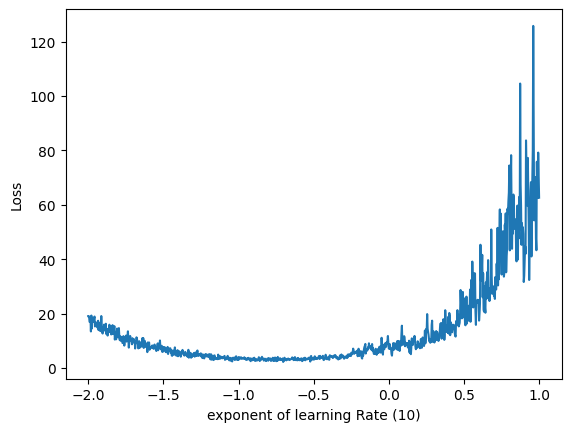

In [ ]:
import matplotlib.pyplot as plt
plt.plot(lri, losses)
# axis label
plt.xlabel('exponent of learning Rate (10)')
plt.ylabel('Loss')

We have best raate some where between -1 to -0.5

In [ ]:
lre = torch.linspace(-1, -0.5, 1000)
lrs = 10**lre

# Keep track of losses and learning rates
lri = []
losses = []

for i in range(1000):
  # minibatch
  ind = torch.randint(0, X.shape[0], (32,))

  # Forward pass
  emb = C[X[ind]] # (32, 3, 2)
  h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32,100)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Y[ind])
  print(f"Loss: {loss.item()}")

  # Backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # Update
  lr = lrs[i]
  for p in parameters:
    p.data += -lr * p.grad

  # Keep track
  losses.append(loss.item())
  lri.append(lre[i])

Loss: 22.427148818969727
Loss: 16.187700271606445
Loss: 17.592777252197266
Loss: 16.782007217407227
Loss: 15.618600845336914
Loss: 16.180007934570312
Loss: 12.3486328125
Loss: 11.82929515838623
Loss: 11.907086372375488
Loss: 12.008750915527344
Loss: 11.432519912719727
Loss: 12.233969688415527
Loss: 9.505082130432129
Loss: 9.454501152038574
Loss: 8.597488403320312
Loss: 9.332486152648926
Loss: 8.312171936035156
Loss: 10.086329460144043
Loss: 9.619857788085938
Loss: 8.95388412475586
Loss: 8.576250076293945
Loss: 11.263404846191406
Loss: 7.367766857147217
Loss: 7.514569282531738
Loss: 5.894955635070801
Loss: 6.919926166534424
Loss: 7.512845516204834
Loss: 8.075029373168945
Loss: 7.350766181945801
Loss: 5.871809482574463
Loss: 7.919771671295166
Loss: 4.428301811218262
Loss: 6.0561041831970215
Loss: 7.420800685882568
Loss: 8.077277183532715
Loss: 6.3015971183776855
Loss: 5.420162677764893
Loss: 5.985555171966553
Loss: 4.4765119552612305
Loss: 5.649874687194824
Loss: 5.539644241333008
Loss: 

Text(0, 0.5, 'Loss')

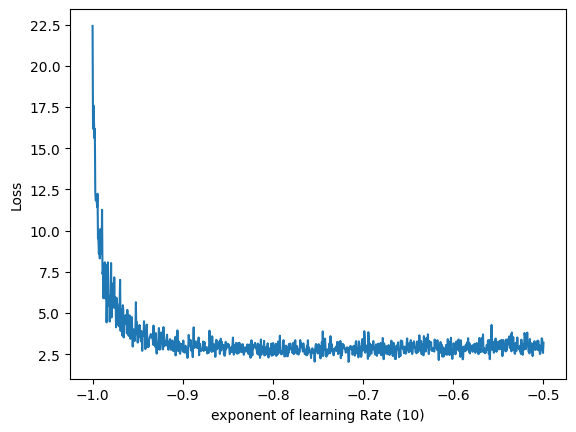

In [ ]:
plt.plot(lri, losses)
# axis label
plt.xlabel('exponent of learning Rate (10)')
plt.ylabel('Loss')

In [ ]:
lre = torch.linspace(-0.7, -0.55, 1000)
lrs = 10**lre

# Keep track of losses and learning rates
lri = []
losses = []

for i in range(1000):
  # minibatch
  ind = torch.randint(0, X.shape[0], (32,))

  # Forward pass
  emb = C[X[ind]] # (32, 3, 2)
  h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32,100)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Y[ind])
  print(f"Loss: {loss.item()}")

  # Backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # Update
  lr = lrs[i]
  for p in parameters:
    p.data += -lr * p.grad

  # Keep track
  losses.append(loss.item())
  lri.append(lre[i])

Loss: 18.55375099182129
Loss: 15.112103462219238
Loss: 14.478941917419434
Loss: 12.804304122924805
Loss: 11.46225357055664
Loss: 13.878819465637207
Loss: 10.310674667358398
Loss: 9.86758041381836
Loss: 10.155557632446289
Loss: 9.668505668640137
Loss: 8.820330619812012
Loss: 8.579142570495605
Loss: 8.821429252624512
Loss: 8.006099700927734
Loss: 8.10275936126709
Loss: 6.070059299468994
Loss: 7.106598377227783
Loss: 6.634131908416748
Loss: 5.811404705047607
Loss: 5.832881927490234
Loss: 5.638774871826172
Loss: 6.504790782928467
Loss: 6.950735092163086
Loss: 7.583988189697266
Loss: 5.910462856292725
Loss: 6.83560037612915
Loss: 5.702666282653809
Loss: 4.486020088195801
Loss: 5.0222649574279785
Loss: 5.675391674041748
Loss: 5.21540641784668
Loss: 6.017065048217773
Loss: 4.2590718269348145
Loss: 5.787405490875244
Loss: 3.891540288925171
Loss: 5.345457553863525
Loss: 4.4046101570129395
Loss: 5.7300028800964355
Loss: 4.455469131469727
Loss: 4.652911186218262
Loss: 4.217805862426758
Loss: 5.72

Text(0, 0.5, 'Loss')

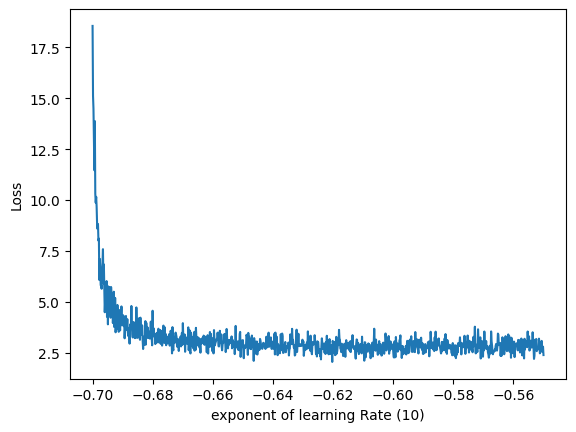

In [ ]:
plt.plot(lri, losses)
# axis label
plt.xlabel('exponent of learning Rate (10)')
plt.ylabel('Loss')

In [ ]:
import pandas as pd
lre = pd.Series(lre)
losses = pd.Series(losses)

In [ ]:
min_loss = losses.min()
min_loss

2.044619560241699

In [ ]:
min_lr = lre[losses.argmin()]
min_lr

np.float32(-0.62027025)

In [ ]:
lr = 10**min_lr
lr

np.float32(0.23973407)

In [ ]:
lr = 0.23973407
for _ in range(10000):
  # minibatch
  ind = torch.randint(0, X.shape[0], (32,))

  # Forward pass
  emb = C[X[ind]] # (32, 3, 2)
  h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32,100)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Y[ind])

  # Backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # Update
  for p in parameters:
    p.data += -lr * p.grad

print(f"Loss: {loss.item()}")

Loss: 2.2504894733428955


In [ ]:
  # Forward pass
  emb = C[X] # (32, 3, 2)
  h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32,100)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Y)
  print(f"Loss: {loss.item()}")

Loss: 2.368868350982666


Everytime I have run the training code I first reset params and X, Y.



**Learning rate decay** we will decay learning rate.

In [ ]:
lr = 0.1
for _ in range(10000):
  # minibatch
  ind = torch.randint(0, X.shape[0], (32,))

  # Forward pass
  emb = C[X[ind]] # (32, 3, 2)
  h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32,100)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Y[ind])

  # Backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # Update
  for p in parameters:
    p.data += -lr * p.grad

print(f"Loss: {loss.item()}")

Loss: 2.37941575050354


In [ ]:
# Evaluate on whole dataset
emb = C[X] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32,100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Y)
print(f"Loss: {loss.item()}")

Loss: 2.3686280250549316


**We have a better model because we have achieved lower loss as compared to previous bigram model. Its not True because this is actually very small model, it will grow as params will  grow. As it will grow it will be overfit. As it will overfit its loss will become lower and lower, it is memorizing training set. If we take the model and get sampling we will get as we have in the training set. We will not get something new. If we will evaluate on some withehld names we will get higher loss. It is not a good model.**


We will split data into:
- training
- dev/validation
- testing

In [ ]:
# training split, dev/validation split, testing split
# 80%, 10%. 10%


# build dataset
def build_dataset(words):
  X, Y = [], []
  for w in words:

    context = [0] * block_size
    for ch in w + '.':
      ind = str_to_ind[ch]
      X.append(context)
      Y.append(ind)
      context = context[1:] + [ind]

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape, Y.shape)
  return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

torch.Size([2001126, 3]) torch.Size([2001126])
torch.Size([250019, 3]) torch.Size([250019])
torch.Size([250289, 3]) torch.Size([250289])


In [ ]:
len(words)

357765

In [ ]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]
print("Total parameters:", sum(p.nelement() for p in parameters))

Total parameters: 3481


In [ ]:
for p in parameters:
  p.requires_grad = True

In [ ]:
lr = 0.1
for _ in range(50000):
  # minibatch
  ind = torch.randint(0, Xtr.shape[0], (32,))

  # Forward pass
  emb = C[Xtr[ind]] # (32, 3, 2)
  h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32,100)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Ytr[ind])

  # Backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # Update
  for p in parameters:
    p.data += -lr * p.grad

print(f"Loss: {loss.item()}")

Loss: 2.0943853855133057


In [ ]:
# Evaluate
emb = C[Xdev] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32,100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ydev)
print(f"Loss: {loss.item()}")

Loss: 2.2265970706939697


In [ ]:
# Evaluate
emb = C[Xtr] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32,100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ytr)
print(f"Loss: {loss.item()}")

Loss: 2.229661464691162


**The training and dev loss are equal so we are not over fitting.**

**This model is not enough powerful to memorize everything, so we are underfitting because training, dev and test losses are about equal.**

**It means our network is very tiny, lets scale it up.**

## Model Scaling

### Experimenring with neurons

Neurons scaled to 300.

In [ ]:
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6, 300), generator=g)
b1 = torch.randn(300, generator=g)
W2 = torch.randn((300, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]
print("Total parameters:", sum(p.nelement() for p in parameters))

Total parameters: 10281


In [ ]:
for p in parameters:
  p.requires_grad = True

In [ ]:
lr = 0.1
steps = []
losses = []
for i in range(50000):
  # minibatch
  ind = torch.randint(0, Xtr.shape[0], (32,))

  # Forward pass
  emb = C[Xtr[ind]] # (32, 3, 2)
  h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32,100)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Ytr[ind])

  # Backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # Update
  for p in parameters:
    p.data += -lr * p.grad

  # Keep track
  steps.append(i)
  losses.append(loss.item())

print(f"Loss: {loss.item()}")

Loss: 2.305817127227783


Text(0, 0.5, 'Loss')

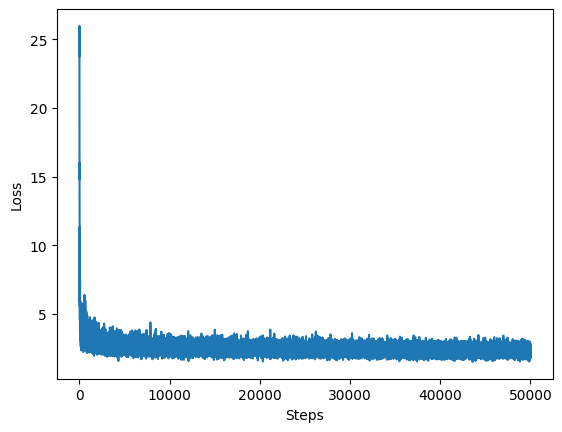

In [ ]:
plt.plot(steps, losses)
plt.xlabel("Steps")
plt.ylabel("Loss")

In [ ]:
# Evaluate
emb = C[Xdev] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32,100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ydev)
print(f"Loss: {loss.item()}")

Loss: 2.347931385040283


In [ ]:
# Evaluate
emb = C[Xtr] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32,100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ytr)
print(f"Loss: {loss.item()}")

Loss: 2.3493025302886963


### Experimenting with batch size

In [ ]:
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

EMB_SIZE = 25

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, EMB_SIZE), generator=g)
W1 = torch.randn((EMB_SIZE *3, 200), generator=g)
b1 = torch.randn(200, generator=g)
W2 = torch.randn((200, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]
print("Total parameters:", sum(p.nelement() for p in parameters))

torch.Size([2000862, 3]) torch.Size([2000862])
torch.Size([250563, 3]) torch.Size([250563])
torch.Size([250009, 3]) torch.Size([250009])
Total parameters: 21302


In [ ]:
for p in parameters:
  p.requires_grad = True

In [ ]:
lr = 0.1
steps = []
losses = []
for i in range(50000):
  # minibatch
  ind = torch.randint(0, Xtr.shape[0], (32,))

  # Forward pass
  emb = C[Xtr[ind]] # (32, 3, 2)
  h = torch.tanh(emb.view(-1, EMB_SIZE*3) @ W1 + b1) # (32,100)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Ytr[ind])

  # Backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # Update
  for p in parameters:
    p.data += -lr * p.grad

  # Keep track
  steps.append(i)
  losses.append(loss.item())

print(f"Loss: {loss.item()}")

Loss: 1.7699711322784424


Text(0, 0.5, 'Loss')

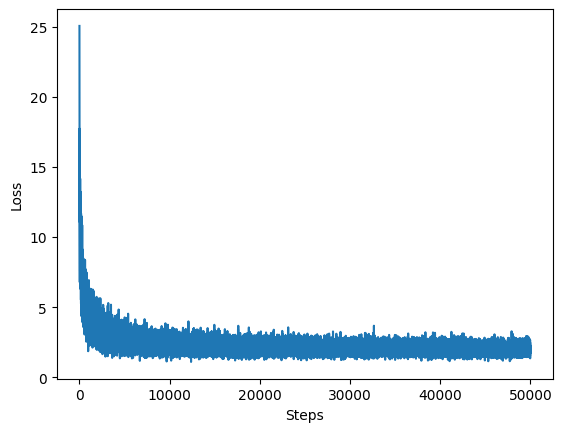

In [ ]:
plt.plot(steps, losses)
plt.xlabel("Steps")
plt.ylabel("Loss")

In [ ]:
# Evaluate
emb = C[Xdev] # (32, 3, 2)
h = torch.tanh(emb.view(-1, EMB_SIZE*3) @ W1 + b1) # (32,100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ydev)
print(f"Loss: {loss.item()}")

Loss: 1.9965656995773315


In [ ]:
# Evaluate
emb = C[Xtr] # (32, 3, 2)
h = torch.tanh(emb.view(-1, EMB_SIZE*3) @ W1 + b1) # (32,100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ytr)
print(f"Loss: {loss.item()}")

Loss: 1.9931608438491821


**Best Performance:**

We run a lots of experiments and slowly we start recognizing which one gives the best performance. Once we find out the best model we take the parameters out and evaluate it on test set performance single time. Thats the nmber we report in paper or whatever where we want.

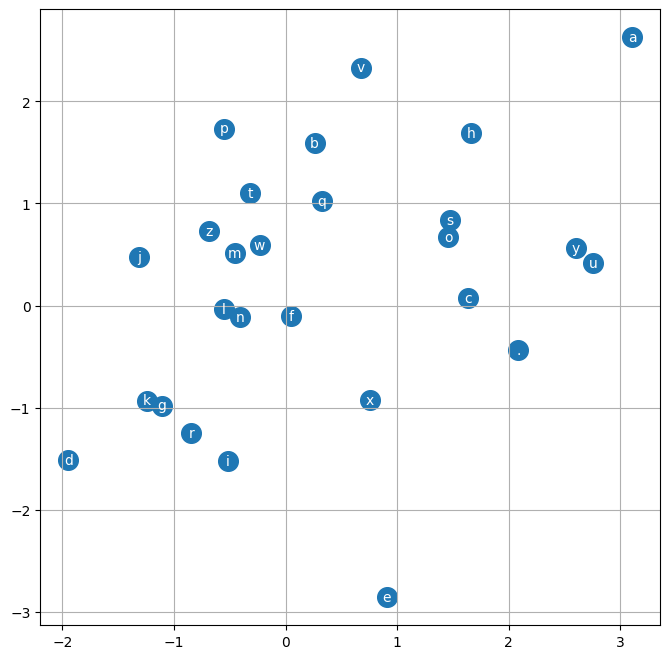

In [ ]:
# plot embeding
with torch.no_grad():
  plt.figure(figsize=(8,8))
  plt.scatter(C[:,0], C[:,1], s=200)
  for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), ind_to_str[i], ha="center", va="center", color="white")
  plt.grid('minor')

## Samplig from model

In [ ]:
# Sampling from model
g = torch.Generator().manual_seed(2147483647)

for _ in range(30):
    out = []

    context = [0] * block_size # initialize with all ...
    while True:
        emb = C[torch.tensor([context])]
        h = torch.tanh(emb.view(1, -1) @ W1 + b1)
        logits = h @ W2 + b2
        probs = F.softmax(logits, dim=1)
        ix = torch.multinomial(probs, num_samples=1, replacement=True, generator=g).item()
        context = context[1:] + [ix]
        out.append(ix)
        if ix == 0:
            break
    print(''.join(ind_to_str[i] for i in out))





muridge.
leasadolforda.
elna.
ger.
rothyida.
gretta.
lenta.
val.
leveactoriaige.
irvinsettie.
yvante.
farmantha.
olette.
phynella.
eues.
refia.
yar.
occhessammie.
demois.
wynver.
garshessie.
opseylda.
orselda.
gel.
gereina.
thor.
rosella.
ivey.
ber.
malius.


Model work much better then before, making progress but still need to make progress.

## Issues

In [6]:
import random
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [7]:
torch.manual_seed(2147483647)

In [8]:
# Vocabulary
chars = sorted(list(set(''.join(words))))
str_to_ind = {s:i+1 for i,s in enumerate(chars)}
str_to_ind['.'] = 0
ind_to_str = {i:s for s,i in str_to_ind.items()}
vocab_size = len(ind_to_str)

In [9]:
# dataset.
block_size = 3
X, Y = [], []  # X = labels , Y = features

for w in words[:5]:
  context = [0]*block_size
  for ch in w + '.':
    ix = str_to_ind[ch] # get embed of char
    X.append(context) # Add context to xs
    Y.append(ix) # Add index to ys.
    context = context[1:] + [ix] # crop and append

X = torch.tensor(X)
Y = torch.tensor(Y)

In [10]:
# build dataset
def build_dataset(words):
  X, Y = [], []
  for w in words:

    context = [0] * block_size
    for ch in w + '.':
      ind = str_to_ind[ch]
      X.append(context)
      Y.append(ind)
      context = context[1:] + [ind]

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape, Y.shape)
  return X, Y

In [ ]:
# Randomise
random.seed(42)
random.shuffle(words)

# Split data
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])


N_EMB_SIZE = 25
BLOCK_SIZE = 3
N_HIDDEN_SIZE = 200

# NN Definition
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((vocab_size, N_EMB_SIZE), generator=g)
W1 = torch.randn((N_EMB_SIZE *BLOCK_SIZE, N_HIDDEN_SIZE), generator=g)
b1 = torch.randn(N_HIDDEN_SIZE, generator=g)
W2 = torch.randn((N_HIDDEN_SIZE, vocab_size), generator=g)
b2 = torch.randn(vocab_size, generator=g)

parameters = [C, W1, b1, W2, b2]
print("Total parameters:", sum(p.nelement() for p in parameters))

for p in parameters:
  p.requires_grad = True


# Training loop
lr = 0.1
steps = []
losses = []
BATCH_SIZE = 32
max_steps = 50_000

for i in range(max_steps):
  # minibatch
  ind = torch.randint(0, Xtr.shape[0], (32,), generator=g)

  # Forward pass
  emb = C[Xtr[ind]] # (32, 3, 2)
  embed_reshaped = emb.view(-1, N_EMB_SIZE*BLOCK_SIZE)
  h_pre_act = embed_reshaped @ W1 + b1
  h = torch.tanh(h_pre_act) # (32,100)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Ytr[ind])

  # Backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # Update
  for p in parameters:
    p.data += -lr * p.grad

  # Keep track
  if i % 10000 == 0:
    print(f"Step: {i:7d} of {max_steps:7d}: Loss: {loss.item():.4f}")
  steps.append(i)
  losses.append(loss.item())


print(f"Training Loss: {loss.item()}")

@torch.no_grad()
def split_loss(split):
  x, y = {
    'train': (Xtr, Ytr),
    'val': (Xdev, Ydev),
    'test': (Xte, Yte),
  }[split]

  emb = C[x] # (N, block size, embed size)
  embed_reshaped = emb.view(emb.shape[0], -1)
  h = torch.tanh(embed_reshaped @ W1 + b1 ) # (32,100)
  logits = h @ W2 + b2 # (N, vocab size)
  loss = F.cross_entropy(logits, y)
  print(split, loss.item())

split_loss('train')
split_loss('val')



torch.Size([1253450, 3]) torch.Size([1253450])
torch.Size([156446, 3]) torch.Size([156446])
torch.Size([156365, 3]) torch.Size([156365])
Total parameters: 21302
Step:       0 of   50000: Loss: 27.7816
Step:   10000 of   50000: Loss: 1.9332
Step:   20000 of   50000: Loss: 2.0258
Step:   30000 of   50000: Loss: 2.0503
Step:   40000 of   50000: Loss: 1.5622
Training Loss: 1.8224127292633057
train 2.008068561553955
val 2.017580509185791


Text(0, 0.5, 'Loss')

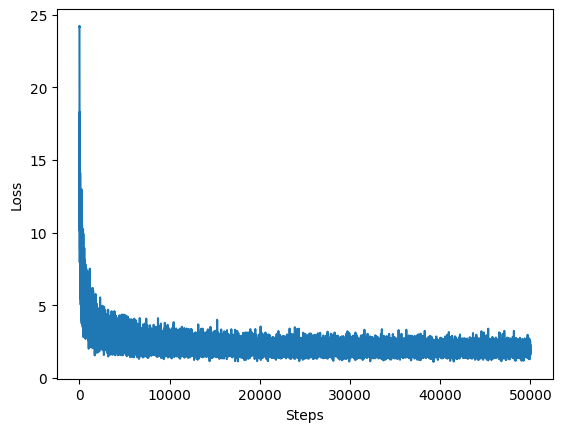

In [ ]:
plt.plot(steps, losses)
plt.xlabel("Steps")
plt.ylabel("Loss")

In [ ]:
# Sampling from model
g = torch.Generator().manual_seed(2147483647)

for _ in range(30):
    out = []

    context = [0] * block_size # initialize with all ...
    while True:
        emb = C[torch.tensor([context])]
        h = torch.tanh(emb.view(1, -1) @ W1 + b1)
        logits = h @ W2 + b2
        probs = F.softmax(logits, dim=1)
        ix = torch.multinomial(probs, num_samples=1, replacement=True, generator=g).item()
        context = context[1:] + [ix]
        out.append(ix)
        if ix == 0:
            break
    print(''.join(ind_to_str[i] for i in out))

junious.
lias.
hop.
clar.
edna.
frita.
toleta.
aretta.
lina.
cram.
levance.
bin.
lowie.
les.
julena.
artha.
nomew.
hilomerry.
phy.
sta.
hosand.
core.
virgianah.
jamille.
froil.
winflsworton.
milias.
sushaddoza.
ivancis.
iria.


### Initialization

Our this model is much much better then previous ones but there are some of the issues to make it more perfect.


**First isuue:**
Step:       0 of   50000: Loss: 26.6882

If we look at this this is the very first step in the training and its loss is 26.67. This is **initialization problem.**


What we aspect is that it should come from uniform distribution. We have 27 charecter lets take  a look.

In [ ]:
-torch.tensor(1/27).log()

tensor(3.2958)

We aspect that the initialization loss should be 3.2958 comming from uniform distribution. This is much much lower than 26.67


**So whats happening here (Problem):**
At initialization the neural network is creating probability distribution which is all messed up, some charecters are very confident and some are not very confident. Also network becomes very confidently wrong.

Lets take an example:

In [ ]:
# We have this
logits = torch.tensor([0.0, 0.0, 0.0, 0.0])
probs = F.softmax(logits, dim=0)
loss = -probs[0].log() # doesnt mater which label its uniform distribution.
probs, loss

(tensor([0.2500, 0.2500, 0.2500, 0.2500]), tensor(1.3863))

Here we are getting loss of 1.3863, if we manupulate distribution we shall gett a very high loss. Let see an example:

In [ ]:
# Manipulated
logits = torch.tensor([-3.0, 5.0, 1.0, 0.0])
probs = F.softmax(logits, dim=0)
loss = -probs[0].log()
probs, loss

(tensor([3.2716e-04, 9.7524e-01, 1.7862e-02, 6.5711e-03]), tensor(8.0251))

Here we can see as we manipulated the distribution loss becomes higher. Here is another example.

In [ ]:
# Random uniform distribution
logits = torch.rand(4)
probs = F.softmax(logits, dim=0)
loss = -probs[0].log()
probs, loss

(tensor([0.1753, 0.2511, 0.3771, 0.1965]), tensor(1.7412))

The random genrated values are uniformly distributed and loss is minimum.

In [ ]:
# Manipulated
logits = torch.rand(4) * 10
probs = F.softmax(logits, dim=0)
loss = -probs[0].log()
probs, loss

(tensor([0.0066, 0.1980, 0.3695, 0.4260]), tensor(5.0268))

Here we have manipulated by multiplying with 10. Distribution changed and loss becomes higher.

In [ ]:
# All equal
logits = torch.tensor([1.0, 1.0, 1.0, 1.0])
probs = F.softmax(logits, dim=0)
loss = -probs[0].log() # doesnt mater which label its uniform distribution.
probs, loss

(tensor([0.2500, 0.2500, 0.2500, 0.2500]), tensor(1.3863))

When numbers are zero the loss is still minimum, this may be normalization inside the softmax. But we don't want positive or negative we want it to be all zeros and record the loss we aspect at the initialization.

**Inspect initialization**

In [ ]:
# Randomise
random.seed(42)
random.shuffle(words)

# Split data
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])


N_EMB_SIZE = 25
BLOCK_SIZE = 3
N_HIDDEN_SIZE = 200

# NN Definition
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((vocab_size, N_EMB_SIZE), generator=g)
W1 = torch.randn((N_EMB_SIZE *BLOCK_SIZE, N_HIDDEN_SIZE), generator=g)
b1 = torch.randn(N_HIDDEN_SIZE, generator=g)
W2 = torch.randn((N_HIDDEN_SIZE, vocab_size), generator=g)
b2 = torch.randn(vocab_size, generator=g)

parameters = [C, W1, b1, W2, b2]
print("Total parameters:", sum(p.nelement() for p in parameters))

for p in parameters:
  p.requires_grad = True


# Training loop
lr = 0.1
steps = []
losses = []
BATCH_SIZE = 32
max_steps = 50_000

for i in range(max_steps):
  # minibatch
  ind = torch.randint(0, Xtr.shape[0], (32,), generator=g)

  # Forward pass
  emb = C[Xtr[ind]] # (32, 3, 2)
  embed_reshaped = emb.view(-1, N_EMB_SIZE*BLOCK_SIZE)
  h_pre_act = embed_reshaped @ W1 + b1
  h = torch.tanh(h_pre_act) # (32,100)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Ytr[ind])

  # Backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # Update
  for p in parameters:
    p.data += -lr * p.grad

  # Keep track
  if i % 10000 == 0:
    print(f"Step: {i:7d} of {max_steps:7d}: Loss: {loss.item():.4f}")
  steps.append(i)
  losses.append(loss.item())

  break

torch.Size([1252856, 3]) torch.Size([1252856])
torch.Size([156666, 3]) torch.Size([156666])
torch.Size([156739, 3]) torch.Size([156739])
Total parameters: 21302
Step:       0 of   50000: Loss: 29.0885


In [ ]:
logits[0]

tensor([  6.7891,  18.5676,   4.1847,  15.5258,  10.6207,   5.0794,   6.0921,
         -4.5567,  -7.0485,  -5.9468,   9.9765,   4.1290, -11.5144,  -8.7225,
         -4.0975,  -5.1656,  24.2899, -15.3293,  -3.3056,  22.4048,  -1.8233,
         -4.7071,  -8.1481,  20.3357,  12.1919, -16.1542,  33.6179],
       grad_fn=<SelectBackward0>)

Logits at the initialization have quite extremete values

(array([3., 3., 7., 0., 5., 3., 2., 2., 1., 1.]),
 array([-16.15422058, -11.17700691,  -6.19979324,  -1.22257957,
          3.75463409,   8.73184776,  13.70906143,  18.6862751 ,
         23.66348877,  28.64070244,  33.61791611]),
 <BarContainer object of 10 artists>)

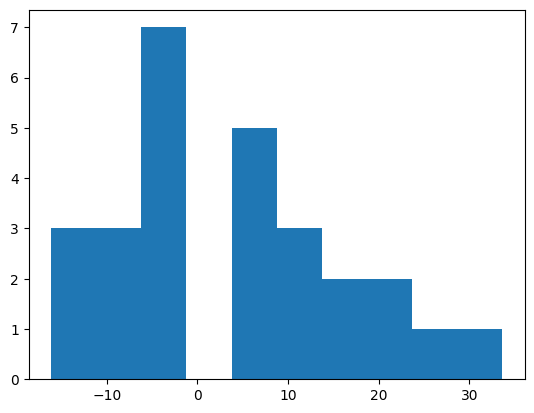

In [ ]:
plt.hist(logits[0].tolist())

How we can achieve logits come out from this neural network more closer to be zero?

So, for this we can make b2 0 and w2 to scale with 0.1 to lower it.

In [ ]:
# Randomise
random.seed(42)
random.shuffle(words)

# Split data
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])


N_EMB_SIZE = 25
BLOCK_SIZE = 3
N_HIDDEN_SIZE = 200

# NN Definition
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((vocab_size, N_EMB_SIZE), generator=g)
W1 = torch.randn((N_EMB_SIZE *BLOCK_SIZE, N_HIDDEN_SIZE), generator=g)
b1 = torch.randn(N_HIDDEN_SIZE, generator=g)
W2 = torch.randn((N_HIDDEN_SIZE, vocab_size), generator=g) * 0.1
b2 = torch.randn(vocab_size, generator=g) * 0

parameters = [C, W1, b1, W2, b2]
print("Total parameters:", sum(p.nelement() for p in parameters))

for p in parameters:
  p.requires_grad = True


# Training loop
lr = 0.1
steps = []
losses = []
BATCH_SIZE = 32
max_steps = 50_000

for i in range(max_steps):
  # minibatch
  ind = torch.randint(0, Xtr.shape[0], (32,), generator=g)

  # Forward pass
  emb = C[Xtr[ind]] # (32, 3, 2)
  embed_reshaped = emb.view(-1, N_EMB_SIZE*BLOCK_SIZE)
  h_pre_act = embed_reshaped @ W1 + b1
  h = torch.tanh(h_pre_act) # (32,100)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Ytr[ind])

  # Backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # Update
  for p in parameters:
    p.data += -lr * p.grad

  # Keep track
  if i % 10000 == 0:
    print(f"Step: {i:7d} of {max_steps:7d}: Loss: {loss.item():.4f}")
  steps.append(i)
  losses.append(loss.item())

  break

torch.Size([1253086, 3]) torch.Size([1253086])
torch.Size([156570, 3]) torch.Size([156570])
torch.Size([156605, 3]) torch.Size([156605])
Total parameters: 21302
Step:       0 of   50000: Loss: 3.9718


Here we can see we are getting very very closer to what we want.

In [ ]:
# Randomise
random.seed(42)
random.shuffle(words)

# Split data
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])


N_EMB_SIZE = 25
BLOCK_SIZE = 3
N_HIDDEN_SIZE = 200

# NN Definition
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((vocab_size, N_EMB_SIZE), generator=g)
W1 = torch.randn((N_EMB_SIZE *BLOCK_SIZE, N_HIDDEN_SIZE), generator=g)
b1 = torch.randn(N_HIDDEN_SIZE, generator=g)
W2 = torch.randn((N_HIDDEN_SIZE, vocab_size), generator=g) * 0
b2 = torch.randn(vocab_size, generator=g) * 0

parameters = [C, W1, b1, W2, b2]
print("Total parameters:", sum(p.nelement() for p in parameters))

for p in parameters:
  p.requires_grad = True


# Training loop
lr = 0.1
steps = []
losses = []
BATCH_SIZE = 32
max_steps = 50_000

for i in range(max_steps):
  # minibatch
  ind = torch.randint(0, Xtr.shape[0], (32,), generator=g)

  # Forward pass
  emb = C[Xtr[ind]] # (32, 3, 2)
  embed_reshaped = emb.view(-1, N_EMB_SIZE*BLOCK_SIZE)
  h_pre_act = embed_reshaped @ W1 + b1
  h = torch.tanh(h_pre_act) # (32,100)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Ytr[ind])

  # Backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # Update
  for p in parameters:
    p.data += -lr * p.grad

  # Keep track
  if i % 10000 == 0:
    print(f"Step: {i:7d} of {max_steps:7d}: Loss: {loss.item():.4f}")
  steps.append(i)
  losses.append(loss.item())

  break

torch.Size([1252570, 3]) torch.Size([1252570])
torch.Size([156807, 3]) torch.Size([156807])
torch.Size([156884, 3]) torch.Size([156884])
Total parameters: 21302
Step:       0 of   50000: Loss: 3.2958


Here we get exactlyu what we want by making w2, b2 all zero. We can do w2 with 0.01.

In [ ]:
# Randomise
random.seed(42)
random.shuffle(words)

# Split data
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])


N_EMB_SIZE = 25
BLOCK_SIZE = 3
N_HIDDEN_SIZE = 200

# NN Definition
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((vocab_size, N_EMB_SIZE), generator=g)
W1 = torch.randn((N_EMB_SIZE *BLOCK_SIZE, N_HIDDEN_SIZE), generator=g)
b1 = torch.randn(N_HIDDEN_SIZE, generator=g)
W2 = torch.randn((N_HIDDEN_SIZE, vocab_size), generator=g) * 0.01
b2 = torch.randn(vocab_size, generator=g) * 0

parameters = [C, W1, b1, W2, b2]
print("Total parameters:", sum(p.nelement() for p in parameters))

for p in parameters:
  p.requires_grad = True


# Training loop
lr = 0.1
steps = []
losses = []
BATCH_SIZE = 32
max_steps = 50_000

for i in range(max_steps):
  # minibatch
  ind = torch.randint(0, Xtr.shape[0], (32,), generator=g)

  # Forward pass
  emb = C[Xtr[ind]] # (32, 3, 2)
  embed_reshaped = emb.view(-1, N_EMB_SIZE*BLOCK_SIZE)
  h_pre_act = embed_reshaped @ W1 + b1
  h = torch.tanh(h_pre_act) # (32,100)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Ytr[ind])

  # Backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # Update
  for p in parameters:
    p.data += -lr * p.grad

  # Keep track
  if i % 10000 == 0:
    print(f"Step: {i:7d} of {max_steps:7d}: Loss: {loss.item():.4f}")
  steps.append(i)
  losses.append(loss.item())

print(f"Training Loss: {loss.item()}")

torch.Size([1252886, 3]) torch.Size([1252886])
torch.Size([156710, 3]) torch.Size([156710])
torch.Size([156665, 3]) torch.Size([156665])
Total parameters: 21302
Step:       0 of   50000: Loss: 3.2706
Step:   10000 of   50000: Loss: 1.5498
Step:   20000 of   50000: Loss: 2.0039
Step:   30000 of   50000: Loss: 2.1103
Step:   40000 of   50000: Loss: 1.9397
Training Loss: 1.5605034828186035


Text(0, 0.5, 'Loss')

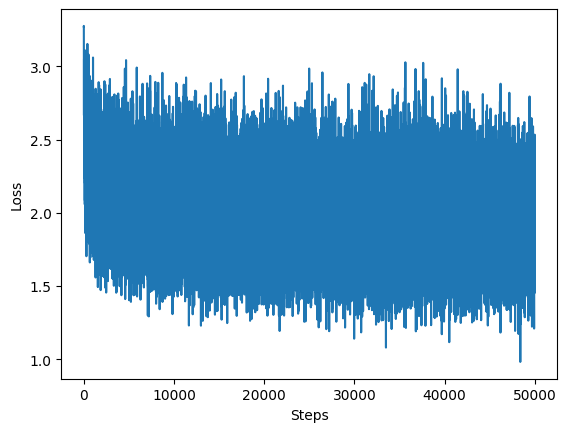

In [ ]:
plt.plot(steps, losses)
plt.xlabel("Steps")
plt.ylabel("Loss")

Now this don't have hockey shape because in the very first few iterations of the loss optimisation is squashing down. Weights are down.

In [ ]:

@torch.no_grad()
def split_loss(split):
  x, y = {
    'train': (Xtr, Ytr),
    'val': (Xdev, Ydev),
    'test': (Xte, Yte),
  }[split]

  emb = C[x] # (N, block size, embed size)
  embed_reshaped = emb.view(emb.shape[0], -1)
  h = torch.tanh(embed_reshaped @ W1 + b1 ) # (32,100)
  logits = h @ W2 + b2 # (N, vocab size)
  loss = F.cross_entropy(logits, y)
  print(split, loss.item())

split_loss('train')
split_loss('val')



train 1.9153109788894653
val 1.9197442531585693


This is also improved.

**Now there is an other example, lets again see.**

In [ ]:
# Randomise
random.seed(42)
random.shuffle(words)

# Split data
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])


N_EMB_SIZE = 25
BLOCK_SIZE = 3
N_HIDDEN_SIZE = 200

# NN Definition
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((vocab_size, N_EMB_SIZE), generator=g)
W1 = torch.randn((N_EMB_SIZE *BLOCK_SIZE, N_HIDDEN_SIZE), generator=g)
b1 = torch.randn(N_HIDDEN_SIZE, generator=g)
W2 = torch.randn((N_HIDDEN_SIZE, vocab_size), generator=g) * 0.01
b2 = torch.randn(vocab_size, generator=g) * 0

parameters = [C, W1, b1, W2, b2]
print("Total parameters:", sum(p.nelement() for p in parameters))

for p in parameters:
  p.requires_grad = True


# Training loop
lr = 0.1
steps = []
losses = []
BATCH_SIZE = 32
max_steps = 50_000

for i in range(max_steps):
  # minibatch
  ind = torch.randint(0, Xtr.shape[0], (32,), generator=g)

  # Forward pass
  emb = C[Xtr[ind]] # (32, 3, 2)
  embed_reshaped = emb.view(-1, N_EMB_SIZE*BLOCK_SIZE)
  h_pre_act = embed_reshaped @ W1 + b1
  h = torch.tanh(h_pre_act) # (32,100)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Ytr[ind])

  # Backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # Update
  for p in parameters:
    p.data += -lr * p.grad

  # Keep track
  if i % 10000 == 0:
    print(f"Step: {i:7d} of {max_steps:7d}: Loss: {loss.item():.4f}")
  steps.append(i)
  losses.append(loss.item())

  break

torch.Size([1253515, 3]) torch.Size([1253515])
torch.Size([156443, 3]) torch.Size([156443])
torch.Size([156303, 3]) torch.Size([156303])
Total parameters: 21302
Step:       0 of   50000: Loss: 3.2918


Now problem is deeper which is h.

In [ ]:
h

tensor([[ 1.0000, -1.0000,  1.0000,  ...,  1.0000, -0.9990, -0.9706],
        [ 1.0000, -0.9276,  0.5621,  ...,  1.0000, -0.9819,  0.9995],
        [-0.9992,  0.9642,  1.0000,  ...,  0.4462, -1.0000,  0.7614],
        ...,
        [-0.3554, -1.0000,  0.9999,  ...,  1.0000, -1.0000, -0.9988],
        [-0.3554, -1.0000,  0.9999,  ...,  1.0000, -1.0000, -0.9988],
        [ 1.0000, -1.0000, -0.9737,  ..., -1.0000, -0.3786,  1.0000]],
       grad_fn=<TanhBackward0>)

(array([2704.,  124.,   46.,   35.,   30.,   24.,   34.,   37.,   15.,
          21.,    7.,   15.,   21.,    8.,   30.,    9.,   27.,    7.,
          16.,   12.,   13.,   13.,   10.,   10.,   22.,   17.,   14.,
          12.,   19.,   11.,   21.,   20.,    7.,    8.,   13.,   17.,
           9.,   13.,   15.,   19.,   18.,    8.,   13.,   17.,   18.,
          33.,   39.,   67.,  110., 2572.]),
 array([-1.  , -0.96, -0.92, -0.88, -0.84, -0.8 , -0.76, -0.72, -0.68,
        -0.64, -0.6 , -0.56, -0.52, -0.48, -0.44, -0.4 , -0.36, -0.32,
        -0.28, -0.24, -0.2 , -0.16, -0.12, -0.08, -0.04,  0.  ,  0.04,
         0.08,  0.12,  0.16,  0.2 ,  0.24,  0.28,  0.32,  0.36,  0.4 ,
         0.44,  0.48,  0.52,  0.56,  0.6 ,  0.64,  0.68,  0.72,  0.76,
         0.8 ,  0.84,  0.88,  0.92,  0.96,  1.  ]),
 <BarContainer object of 50 artists>)

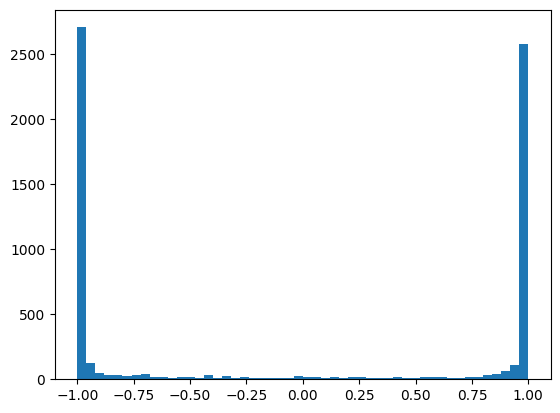

In [ ]:
plt.hist(h.view(-1).tolist(), bins=50)

Here tanh is very very active because most of the values are 1 or -1.

(array([  1.,   0.,   0.,   7.,   0.,   4.,   2.,   7.,   8.,   9.,  34.,
         29.,  45.,  75.,  64.,  81., 112., 149., 214., 228., 264., 310.,
        285., 282., 357., 347., 407., 332., 392., 321., 358., 251., 283.,
        239., 215., 173., 133., 114.,  61.,  41.,  47.,  36.,  20.,  26.,
          7.,  13.,  14.,   1.,   1.,   1.]),
 array([-34.89786148, -33.60221233, -32.30656319, -31.01091404,
        -29.71526489, -28.41961575, -27.1239666 , -25.82831745,
        -24.5326683 , -23.23701916, -21.94137001, -20.64572086,
        -19.35007172, -18.05442257, -16.75877342, -15.46312428,
        -14.16747513, -12.87182598, -11.57617683, -10.28052769,
         -8.98487854,  -7.68922939,  -6.39358025,  -5.0979311 ,
         -3.80228195,  -2.5066328 ,  -1.21098366,   0.08466549,
          1.38031464,   2.67596378,   3.97161293,   5.26726208,
          6.56291122,   7.85856037,   9.15420952,  10.44985867,
         11.74550781,  13.04115696,  14.33680611,  15.63245525,
         16.928104

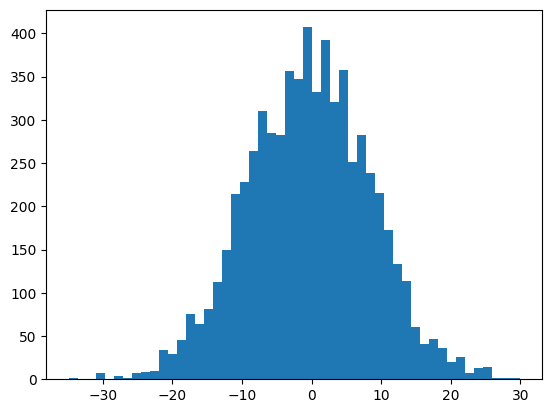

In [ ]:
plt.hist(h_pre_act.view(-1).tolist(), bins=50)

The pre activation is very broad it takes numbers from -30 to +25  this is why torch.tanh is very active and values are very active.

**When h is mostly in 1 or -1 then the problem is the gradiend is destroyed.**

Lets check how often h is in flat region:

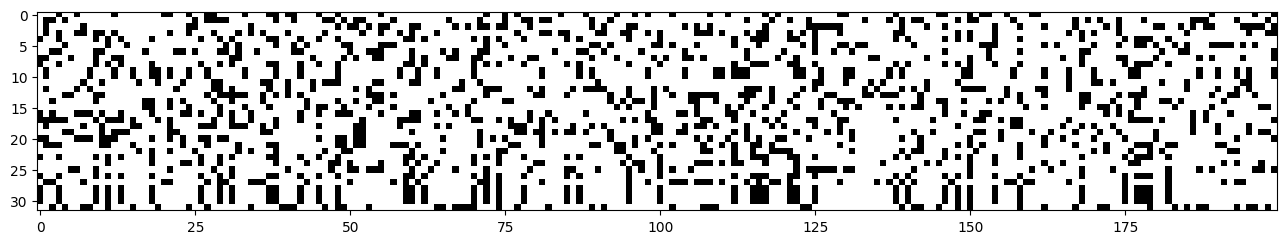

In [ ]:
plt.figure(figsize=(16,10))
plt.imshow(h.abs() > 0.99, cmap='gray', interpolation='nearest')

All of the white area is a place where neurons will be dead. Fortunately, there is no column here where all white, but mostly things are white it menas mostly neurons are dead.

All of this is because h_pre_act is ranging from -30 to +25 which is very broad.

What to do is now is that we need to bring h_pre_act close to zero.

Now we shall  make bias b1 0 and w2 as minimal to scale with 0.01, thats how we shall change h_pre_act.

In [ ]:
# Randomise
random.seed(42)
random.shuffle(words)

# Split data
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])


N_EMB_SIZE = 25
BLOCK_SIZE = 3
N_HIDDEN_SIZE = 200

# NN Definition
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((vocab_size, N_EMB_SIZE), generator=g)
W1 = torch.randn((N_EMB_SIZE *BLOCK_SIZE, N_HIDDEN_SIZE), generator=g) * 0.001
b1 = torch.randn(N_HIDDEN_SIZE, generator=g) * 0
W2 = torch.randn((N_HIDDEN_SIZE, vocab_size), generator=g) * 0.01
b2 = torch.randn(vocab_size, generator=g) * 0

parameters = [C, W1, b1, W2, b2]
print("Total parameters:", sum(p.nelement() for p in parameters))

for p in parameters:
  p.requires_grad = True


# Training loop
lr = 0.1
steps = []
losses = []
BATCH_SIZE = 32
max_steps = 50_000

for i in range(max_steps):
  # minibatch
  ind = torch.randint(0, Xtr.shape[0], (32,), generator=g)

  # Forward pass
  emb = C[Xtr[ind]] # (32, 3, 2)
  embed_reshaped = emb.view(-1, N_EMB_SIZE*BLOCK_SIZE)
  h_pre_act = embed_reshaped @ W1 + b1
  h = torch.tanh(h_pre_act) # (32,100)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Ytr[ind])

  # Backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # Update
  for p in parameters:
    p.data += -lr * p.grad

  # Keep track
  if i % 10000 == 0:
    print(f"Step: {i:7d} of {max_steps:7d}: Loss: {loss.item():.4f}")
  steps.append(i)
  losses.append(loss.item())

  break

torch.Size([1252812, 3]) torch.Size([1252812])
torch.Size([156819, 3]) torch.Size([156819])
torch.Size([156630, 3]) torch.Size([156630])
Total parameters: 21302
Step:       0 of   50000: Loss: 3.2958


(array([  6.,   3.,   1.,   3.,   6.,   9.,  16.,  20.,  34.,  40.,  50.,
         76.,  76., 106., 109., 170., 219., 225., 257., 291., 265., 295.,
        317., 355., 368., 349., 383., 304., 295., 296., 261., 202., 216.,
        160., 145., 124.,  73.,  55.,  55.,  46.,  49.,  20.,  14.,   3.,
          5.,  11.,   7.,   6.,   2.,   2.]),
 array([-0.02952423, -0.02833311, -0.02714199, -0.02595087, -0.02475975,
        -0.02356862, -0.0223775 , -0.02118638, -0.01999526, -0.01880414,
        -0.01761302, -0.01642189, -0.01523077, -0.01403965, -0.01284853,
        -0.01165741, -0.01046629, -0.00927516, -0.00808404, -0.00689292,
        -0.0057018 , -0.00451068, -0.00331956, -0.00212843, -0.00093731,
         0.00025381,  0.00144493,  0.00263605,  0.00382717,  0.0050183 ,
         0.00620942,  0.00740054,  0.00859166,  0.00978278,  0.01097391,
         0.01216503,  0.01335615,  0.01454727,  0.01573839,  0.01692951,
         0.01812064,  0.01931176,  0.02050288,  0.021694  ,  0.02288512,
 

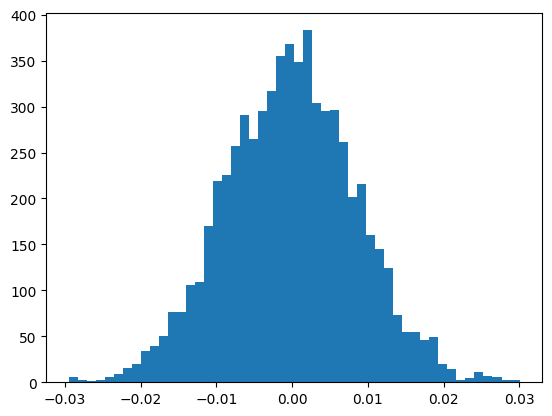

In [ ]:
plt.hist(h.view(-1).tolist(), bins=50)

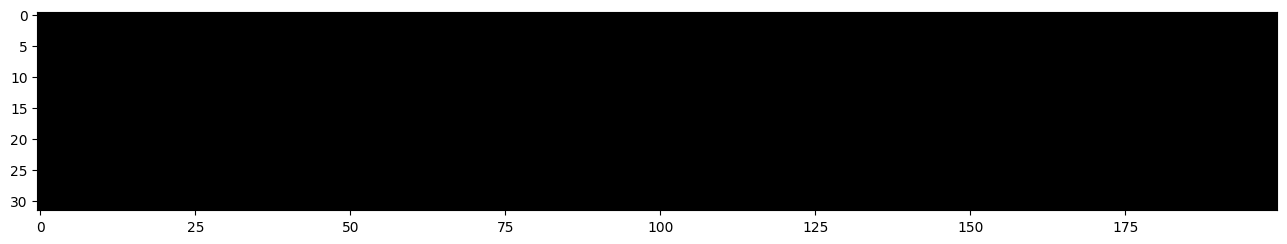

In [ ]:
plt.figure(figsize=(16,10))
plt.imshow(h.abs() > 0.99, cmap='gray', interpolation='nearest')

Wooohoooo!!! Its all black no neuron is dead now.

(array([  6.,   3.,   1.,   3.,   6.,   9.,  16.,  20.,  34.,  40.,  50.,
         76.,  76., 106., 109., 170., 218., 226., 257., 290., 264., 297.,
        317., 355., 368., 349., 383., 304., 295., 296., 262., 202., 215.,
        161., 144., 124.,  73.,  55.,  56.,  45.,  49.,  20.,  14.,   3.,
          5.,  11.,   7.,   6.,   2.,   2.]),
 array([-0.02953282, -0.02834134, -0.02714987, -0.02595839, -0.02476692,
        -0.02357545, -0.02238397, -0.0211925 , -0.02000102, -0.01880955,
        -0.01761808, -0.0164266 , -0.01523513, -0.01404365, -0.01285218,
        -0.01166071, -0.01046923, -0.00927776, -0.00808628, -0.00689481,
        -0.00570334, -0.00451186, -0.00332039, -0.00212891, -0.00093744,
         0.00025403,  0.00144551,  0.00263698,  0.00382846,  0.00501993,
         0.00621141,  0.00740288,  0.00859435,  0.00978583,  0.0109773 ,
         0.01216878,  0.01336025,  0.01455172,  0.0157432 ,  0.01693467,
         0.01812615,  0.01931762,  0.02050909,  0.02170057,  0.02289204,
 

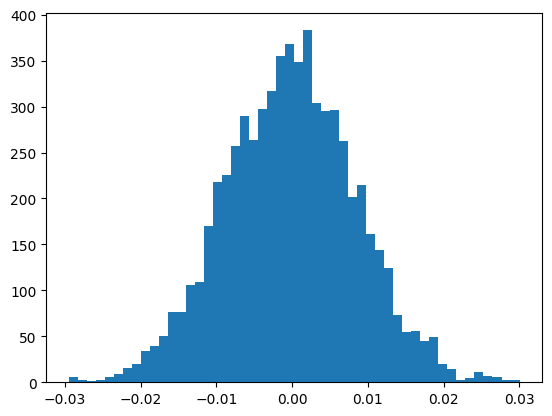

In [ ]:
plt.hist(h_pre_act.view(-1).tolist(), bins=50)

It is also not widely spreaded.

In [ ]:
# Randomise
random.seed(42)
random.shuffle(words)

# Split data
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])


N_EMB_SIZE = 25
BLOCK_SIZE = 3
N_HIDDEN_SIZE = 200

# NN Definition
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((vocab_size, N_EMB_SIZE), generator=g)
W1 = torch.randn((N_EMB_SIZE *BLOCK_SIZE, N_HIDDEN_SIZE), generator=g) * 0.1
b1 = torch.randn(N_HIDDEN_SIZE, generator=g) * 0
W2 = torch.randn((N_HIDDEN_SIZE, vocab_size), generator=g) * 0.001
b2 = torch.randn(vocab_size, generator=g) * 0

parameters = [C, W1, b1, W2, b2]
print("Total parameters:", sum(p.nelement() for p in parameters))

for p in parameters:
  p.requires_grad = True


# Training loop
lr = 0.1
steps = []
losses = []
BATCH_SIZE = 32
max_steps = 50_000

for i in range(max_steps):
  # minibatch
  ind = torch.randint(0, Xtr.shape[0], (32,), generator=g)

  # Forward pass
  emb = C[Xtr[ind]] # (32, 3, 2)
  embed_reshaped = emb.view(-1, N_EMB_SIZE*BLOCK_SIZE)
  h_pre_act = embed_reshaped @ W1 + b1
  h = torch.tanh(h_pre_act) # (32,100)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Ytr[ind])

  # Backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # Update
  for p in parameters:
    p.data += -lr * p.grad

  # Keep track
  if i % 10000 == 0:
    print(f"Step: {i:7d} of {max_steps:7d}: Loss: {loss.item():.4f}")
  steps.append(i)
  losses.append(loss.item())

  break


torch.Size([1253196, 3]) torch.Size([1253196])
torch.Size([156580, 3]) torch.Size([156580])
torch.Size([156485, 3]) torch.Size([156485])
Total parameters: 21302
Step:       0 of   50000: Loss: 3.2964


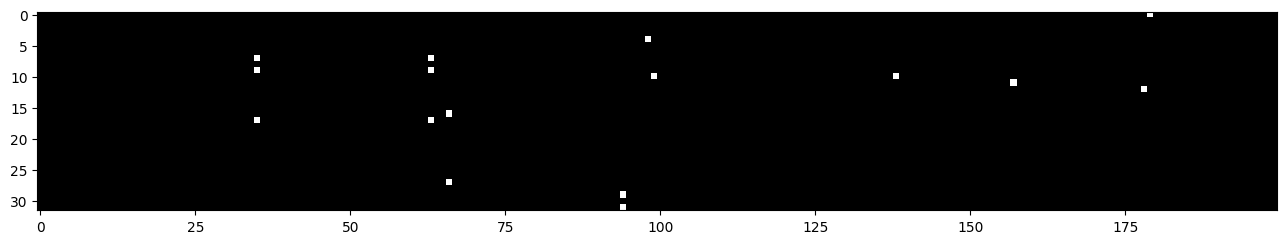

In [ ]:
plt.figure(figsize=(16,10))
plt.imshow(h.abs() > 0.99, cmap='gray', interpolation='nearest')

(array([ 89., 140., 135., 150., 159., 157., 151., 138., 137., 140., 161.,
        132., 135., 141., 128., 130., 121., 147., 128., 147., 129., 140.,
        128., 117., 131., 111., 117., 114.,  86., 130., 116., 120.,  98.,
        105., 136., 126., 112., 131., 120., 149., 112., 126., 146., 124.,
        133., 128., 161., 105., 102.,  81.]),
 array([-9.99261260e-01, -9.59287583e-01, -9.19313905e-01, -8.79340228e-01,
        -8.39366550e-01, -7.99392873e-01, -7.59419196e-01, -7.19445518e-01,
        -6.79471841e-01, -6.39498163e-01, -5.99524486e-01, -5.59550809e-01,
        -5.19577131e-01, -4.79603454e-01, -4.39629776e-01, -3.99656099e-01,
        -3.59682422e-01, -3.19708744e-01, -2.79735067e-01, -2.39761389e-01,
        -1.99787712e-01, -1.59814035e-01, -1.19840357e-01, -7.98666799e-02,
        -3.98930025e-02,  8.06748867e-05,  4.00543523e-02,  8.00280297e-02,
         1.20001707e-01,  1.59975384e-01,  1.99949062e-01,  2.39922739e-01,
         2.79896417e-01,  3.19870094e-01,  3.59843

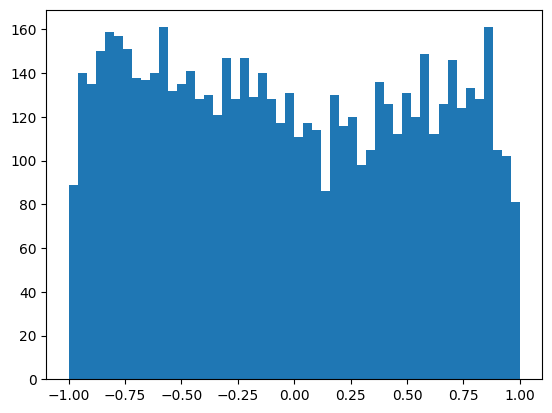

In [ ]:
plt.hist(h.view(-1).tolist(), bins=50)

### Kaiming Initialization

Multiplying w1 with a number to make the uniform distribution is like a magic, Especially in deep neural networks. Thats why we can use **Kaiming initialization.**


= (5/3)/SQRT(fan_in)

In [ ]:
# Randomise
random.seed(42)
random.shuffle(words)

# Split data
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])


N_EMB_SIZE = 25
BLOCK_SIZE = 3
N_HIDDEN_SIZE = 200

# NN Definition
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((vocab_size, N_EMB_SIZE), generator=g)
W1 = torch.randn((N_EMB_SIZE *BLOCK_SIZE, N_HIDDEN_SIZE), generator=g) * ((5/3)/((N_EMB_SIZE *BLOCK_SIZE)**0.5))
b1 = torch.randn(N_HIDDEN_SIZE, generator=g) * 0
W2 = torch.randn((N_HIDDEN_SIZE, vocab_size), generator=g) * 0
b2 = torch.randn(vocab_size, generator=g) * 0

parameters = [C, W1, b1, W2, b2]
print("Total parameters:", sum(p.nelement() for p in parameters))

for p in parameters:
  p.requires_grad = True


# Training loop
lr = 0.1
steps = []
losses = []
BATCH_SIZE = 32
max_steps = 50_000

for i in range(max_steps):
  # minibatch
  ind = torch.randint(0, Xtr.shape[0], (32,), generator=g)

  # Forward pass
  emb = C[Xtr[ind]] # (32, 3, 2)
  embed_reshaped = emb.view(-1, N_EMB_SIZE*BLOCK_SIZE)
  h_pre_act = embed_reshaped @ W1 + b1
  h = torch.tanh(h_pre_act) # (32,100)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Ytr[ind])

  # Backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # Update
  for p in parameters:
    p.data += -lr * p.grad

  # Keep track
  if i % 10000 == 0:
    print(f"Step: {i:7d} of {max_steps:7d}: Loss: {loss.item():.4f}")
  steps.append(i)
  losses.append(loss.item())

  break


torch.Size([10476289, 3]) torch.Size([10476289])
torch.Size([1309463, 3]) torch.Size([1309463])
torch.Size([1310079, 3]) torch.Size([1310079])
Total parameters: 21302
Step:       0 of   50000: Loss: 3.2958


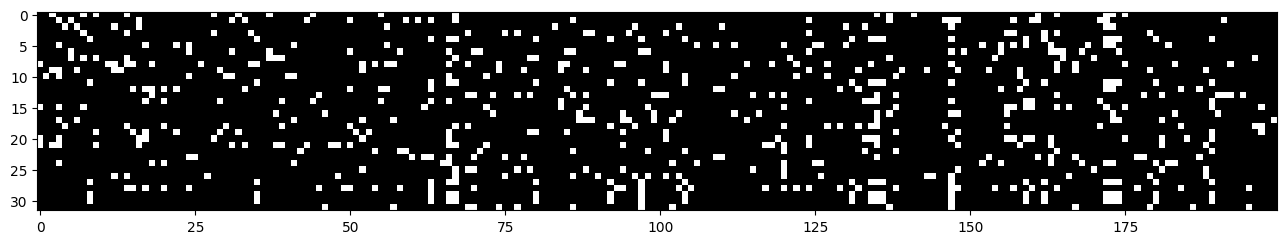

In [ ]:
plt.figure(figsize=(16,10))
plt.imshow(h.abs() > 0.99, cmap='gray', interpolation='nearest')

(array([782., 367., 233., 180., 143., 134., 109.,  95., 104.,  95., 105.,
         77.,  78.,  93.,  63.,  68.,  77.,  67.,  47.,  61.,  65.,  64.,
         77.,  57.,  51.,  72.,  53.,  57.,  74.,  54.,  74.,  55.,  62.,
         73.,  51.,  66.,  91.,  69.,  95.,  65.,  88.,  93.,  91., 116.,
        134., 155., 183., 219., 307., 711.]),
 array([-9.99993145e-01, -9.59993657e-01, -9.19994168e-01, -8.79994680e-01,
        -8.39995191e-01, -7.99995703e-01, -7.59996214e-01, -7.19996725e-01,
        -6.79997237e-01, -6.39997748e-01, -5.99998260e-01, -5.59998771e-01,
        -5.19999282e-01, -4.79999794e-01, -4.40000305e-01, -4.00000817e-01,
        -3.60001328e-01, -3.20001839e-01, -2.80002351e-01, -2.40002862e-01,
        -2.00003374e-01, -1.60003885e-01, -1.20004396e-01, -8.00049078e-02,
        -4.00054193e-02, -5.93066216e-06,  3.99935579e-02,  7.99930465e-02,
         1.19992535e-01,  1.59992024e-01,  1.99991512e-01,  2.39991001e-01,
         2.79990489e-01,  3.19989978e-01,  3.59989

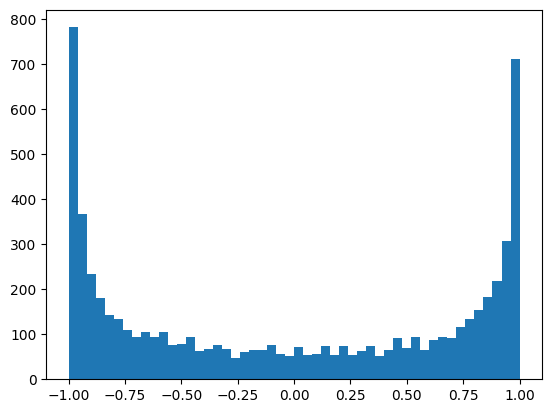

In [ ]:
plt.hist(h.view(-1).tolist(), bins=50)

### Batch Normalization

Wel,, our previous settings was good with W1 = 0.1, so this is a technique we can use.


But now there are so many advancements come. We are going to work with **Batch normalisation.** Thats why precise settings of these initialisations are not important due to modern innovation. And batch normalisation is one of them.
Lets see:

In [ ]:
# Randomise
random.seed(42)
random.shuffle(words)

# Split data
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])


N_EMB_SIZE = 25
BLOCK_SIZE = 3
N_HIDDEN_SIZE = 200

# NN Definition
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((vocab_size, N_EMB_SIZE), generator=g)
W1 = torch.randn((N_EMB_SIZE *BLOCK_SIZE, N_HIDDEN_SIZE), generator=g)
b1 = torch.randn(N_HIDDEN_SIZE, generator=g)
W2 = torch.randn((N_HIDDEN_SIZE, vocab_size), generator=g) * 0.01
b2 = torch.randn(vocab_size, generator=g) * 0

parameters = [C, W1, b1, W2, b2]
print("Total parameters:", sum(p.nelement() for p in parameters))

for p in parameters:
  p.requires_grad = True


# Training loop
lr = 0.1
steps = []
losses = []
BATCH_SIZE = 32
max_steps = 50_000

for i in range(max_steps):
  # minibatch
  ind = torch.randint(0, Xtr.shape[0], (32,), generator=g)

  # Forward pass
  emb = C[Xtr[ind]] # (32, 3, 2)
  embed_reshaped = emb.view(-1, N_EMB_SIZE*BLOCK_SIZE)
  h_pre_act = embed_reshaped @ W1 + b1
  h = torch.tanh(h_pre_act) # (32,100)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Ytr[ind])

  # Backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # Update
  for p in parameters:
    p.data += -lr * p.grad

  # Keep track
  if i % 10000 == 0:
    print(f"Step: {i:7d} of {max_steps:7d}: Loss: {loss.item():.4f}")
  steps.append(i)
  losses.append(loss.item())

  break

torch.Size([10475681, 3]) torch.Size([10475681])
torch.Size([1309567, 3]) torch.Size([1309567])
torch.Size([1310583, 3]) torch.Size([1310583])
Total parameters: 21302
Step:       0 of   50000: Loss: 3.3096


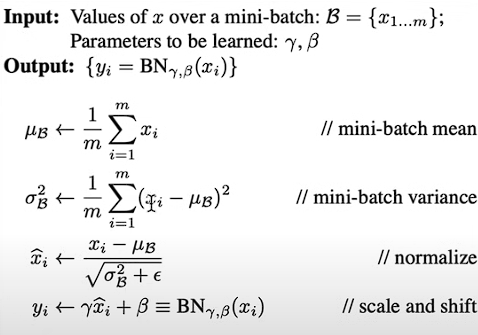

Paper says you have hidden states take them and normalise them tto be roughly gaussian.

In [ ]:
h_pre_act.shape

torch.Size([32, 200])

In [ ]:
h_pre_act.mean(0, keepdim=True)

tensor([[ 2.6259e+00, -3.8784e+00,  1.6117e+00, -5.9929e+00, -2.2183e-01,
          1.5601e+00,  1.3062e+00,  1.3533e+00, -6.2073e+00,  1.7316e+00,
          1.5831e+00, -4.6390e+00, -5.8262e-01, -1.0779e+00, -7.5028e+00,
          5.5569e+00,  2.3208e+00,  1.6148e+00, -1.9621e+00, -1.8187e+00,
         -6.6915e+00, -1.5318e+00,  3.5921e+00, -4.6223e+00, -3.6808e+00,
         -1.0598e+00,  2.6699e-01, -2.4593e+00, -2.9095e-01, -4.3429e+00,
          2.9057e+00, -1.4027e+00,  4.4217e+00, -2.5886e+00, -1.9791e+00,
          5.0173e+00, -3.9375e-01, -2.2792e+00, -4.7054e+00,  6.1450e+00,
          4.6563e+00, -2.9053e+00,  3.4566e+00, -1.9624e+00,  3.3128e+00,
         -2.5381e+00, -1.4882e+00,  2.1878e+00, -1.7316e+00, -5.5153e-02,
          9.0764e-01, -8.8770e-01,  4.0191e+00,  5.9337e+00, -5.5763e+00,
          1.7766e+00,  5.2066e+00, -1.3452e+00,  4.1278e+00, -2.0009e+00,
         -1.6673e-01, -9.5946e-02,  5.6249e+00, -5.5095e+00,  2.8354e-01,
         -5.0300e+00, -1.1605e+01, -1.

**Step 1**: mean

In [ ]:
h_pre_act.mean(0, keepdim=True).shape

torch.Size([1, 200])

**Step 2**: Standard Deviation

In [ ]:
h_pre_act.std(0, keepdim=True).shape

torch.Size([1, 200])

**Step 3**: Normalise

In [ ]:
h_pre_act = (h_pre_act - h_pre_act.mean(0, keepdim=True)) / h_pre_act.std(0, keepdim=True)

This will normalise, but we want this at just initialization. We don't distribution to be gaussian after initialization it can be anything. So,

**Step 4**: Scale and Shift

In [ ]:
batch_norm_gain = torch.ones((1, N_HIDDEN_SIZE))
batch_norm_bias = torch.zeros((1, N_HIDDEN_SIZE))

In [ ]:
h_pre_act = batch_norm_gain * (h_pre_act - h_pre_act.mean(0, keepdim=True)) / h_pre_act.std(0, keepdim=True) + batch_norm_bias

parameters will also be added by batch_norm_gain and batch_norm_bias

In [ ]:
# Randomise
random.seed(42)
random.shuffle(words)

# Split data
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])


N_EMB_SIZE = 25
BLOCK_SIZE = 3
N_HIDDEN_SIZE = 200

batch_norm_gain = torch.ones((1, N_HIDDEN_SIZE))
batch_norm_bias = torch.zeros((1, N_HIDDEN_SIZE))

# NN Definition
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((vocab_size, N_EMB_SIZE), generator=g)
W1 = torch.randn((N_EMB_SIZE *BLOCK_SIZE, N_HIDDEN_SIZE), generator=g)
b1 = torch.randn(N_HIDDEN_SIZE, generator=g)
W2 = torch.randn((N_HIDDEN_SIZE, vocab_size), generator=g) * 0.01
b2 = torch.randn(vocab_size, generator=g) * 0

parameters = [C, W1, b1, W2, b2, batch_norm_bias, batch_norm_gain]
print("Total parameters:", sum(p.nelement() for p in parameters))

for p in parameters:
  p.requires_grad = True


# Training loop
lr = 0.1
steps = []
losses = []
BATCH_SIZE = 32
max_steps = 50_000

for i in range(max_steps):
  # minibatch
  ind = torch.randint(0, Xtr.shape[0], (32,), generator=g)

  # Forward pass
  emb = C[Xtr[ind]] # (32, 3, 2)
  embed_reshaped = emb.view(-1, N_EMB_SIZE*BLOCK_SIZE)
  h_pre_act = embed_reshaped @ W1 + b1
  h_pre_act = batch_norm_gain * (h_pre_act - h_pre_act.mean(0, keepdim=True)) / h_pre_act.std(0, keepdim=True) + batch_norm_bias
  h = torch.tanh(h_pre_act) # (32,100)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Ytr[ind])

  # Backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # Update
  for p in parameters:
    p.data += -lr * p.grad

  # Keep track
  if i % 10000 == 0:
    print(f"Step: {i:7d} of {max_steps:7d}: Loss: {loss.item():.4f}")
  steps.append(i)
  losses.append(loss.item())


print(f"Training Loss: {loss.item()}")

@torch.no_grad()
def split_loss(split):
  x, y = {
    'train': (Xtr, Ytr),
    'val': (Xdev, Ydev),
    'test': (Xte, Yte),
  }[split]

  emb = C[x] # (N, block size, embed size)
  embed_reshaped = emb.view(emb.shape[0], -1)
  h_pre_act = embed_reshaped @ W1 + b1
  h_pre_act = batch_norm_gain * (h_pre_act - h_pre_act.mean(0, keepdim=True)) / h_pre_act.std(0, keepdim=True) + batch_norm_bias
  h = torch.tanh(h_pre_act) # (32,100)
  logits = h @ W2 + b2 # (N, vocab size)
  loss = F.cross_entropy(logits, y)
  print(split, loss.item())

split_loss('train')
split_loss('val')



torch.Size([2000878, 3]) torch.Size([2000878])
torch.Size([250415, 3]) torch.Size([250415])
torch.Size([250141, 3]) torch.Size([250141])
Total parameters: 21702
Step:       0 of   50000: Loss: 3.2832
Step:   10000 of   50000: Loss: 2.4352
Step:   20000 of   50000: Loss: 1.8461
Step:   30000 of   50000: Loss: 2.0862
Step:   40000 of   50000: Loss: 2.2491
Training Loss: 2.262040138244629
train 1.9538277387619019
val 1.955641508102417


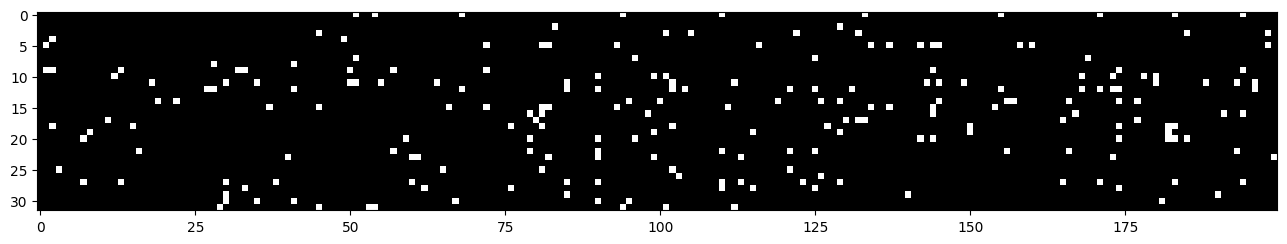

In [ ]:
plt.figure(figsize=(16,10))
plt.imshow(h.abs() > 0.99, cmap='gray', interpolation='nearest')

(array([331., 232., 173., 142., 134., 150., 129., 166., 143., 123., 120.,
        107., 113., 104., 112.,  98., 113.,  89.,  97.,  87.,  95.,  97.,
         84.,  92.,  81.,  95.,  92., 106., 106.,  96.,  97.,  88., 116.,
         89., 120., 104., 125.,  87., 103., 120., 112., 133., 129., 134.,
        119., 140., 152., 196., 214., 315.]),
 array([-9.99896467e-01, -9.59899074e-01, -9.19901681e-01, -8.79904288e-01,
        -8.39906895e-01, -7.99909502e-01, -7.59912109e-01, -7.19914716e-01,
        -6.79917324e-01, -6.39919931e-01, -5.99922538e-01, -5.59925145e-01,
        -5.19927752e-01, -4.79930359e-01, -4.39932966e-01, -3.99935573e-01,
        -3.59938180e-01, -3.19940788e-01, -2.79943395e-01, -2.39946002e-01,
        -1.99948609e-01, -1.59951216e-01, -1.19953823e-01, -7.99564302e-02,
        -3.99590373e-02,  3.83555889e-05,  4.00357485e-02,  8.00331414e-02,
         1.20030534e-01,  1.60027927e-01,  2.00025320e-01,  2.40022713e-01,
         2.80020106e-01,  3.20017499e-01,  3.60014

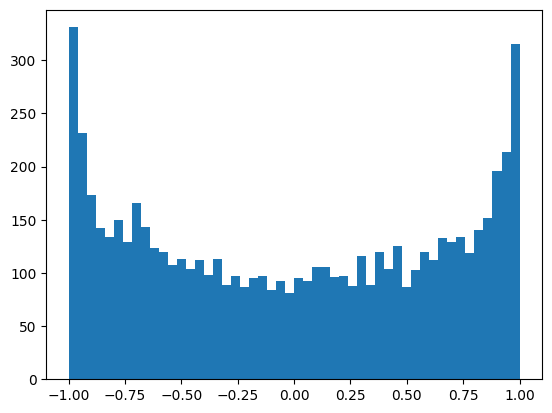

In [ ]:
plt.hist(h.view(-1).tolist(), 50)

We can See just with batxh normalization things are pretty good, no kaiming init. , no magic number etc. just simple steps of code made it pretty awesome.

Now we need to feed single example here. But it expects mean and std from batch. Let's see how!

In [ ]:
# Randomise
random.seed(42)
random.shuffle(words)

# Split data
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])


N_EMB_SIZE = 25
BLOCK_SIZE = 3
N_HIDDEN_SIZE = 200

batch_norm_gain = torch.ones((1, N_HIDDEN_SIZE))
batch_norm_bias = torch.zeros((1, N_HIDDEN_SIZE))

# NN Definition
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((vocab_size, N_EMB_SIZE), generator=g)
W1 = torch.randn((N_EMB_SIZE *BLOCK_SIZE, N_HIDDEN_SIZE), generator=g)
b1 = torch.randn(N_HIDDEN_SIZE, generator=g)
W2 = torch.randn((N_HIDDEN_SIZE, vocab_size), generator=g) * 0.01
b2 = torch.randn(vocab_size, generator=g) * 0

parameters = [C, W1, b1, W2, b2, batch_norm_bias, batch_norm_gain]
print("Total parameters:", sum(p.nelement() for p in parameters))

for p in parameters:
  p.requires_grad = True


# Training loop
lr = 0.1
steps = []
losses = []
BATCH_SIZE = 32
max_steps = 50_000

for i in range(max_steps):
  # minibatch
  ind = torch.randint(0, Xtr.shape[0], (32,), generator=g)

  # Forward pass
  emb = C[Xtr[ind]] # (32, 3, 2)
  embed_reshaped = emb.view(-1, N_EMB_SIZE*BLOCK_SIZE)
  h_pre_act = embed_reshaped @ W1 + b1
  h_pre_act = batch_norm_gain * (h_pre_act - h_pre_act.mean(0, keepdim=True)) / h_pre_act.std(0, keepdim=True) + batch_norm_bias
  h = torch.tanh(h_pre_act) # (32,100)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Ytr[ind])

  # Backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # Update
  for p in parameters:
    p.data += -lr * p.grad

  # Keep track
  if i % 10000 == 0:
    print(f"Step: {i:7d} of {max_steps:7d}: Loss: {loss.item():.4f}")
  steps.append(i)
  losses.append(loss.item())


print(f"Training Loss: {loss.item()}")

@torch.no_grad()
def split_loss(split):
  x, y = {
    'train': (Xtr, Ytr),
    'val': (Xdev, Ydev),
    'test': (Xte, Yte),
  }[split]

  emb = C[x] # (N, block size, embed size)
  embed_reshaped = emb.view(emb.shape[0], -1)
  h_pre_act = embed_reshaped @ W1 + b1
  h_pre_act = batch_norm_gain * (h_pre_act - h_pre_act.mean(0, keepdim=True)) / h_pre_act.std(0, keepdim=True) + batch_norm_bias
  h = torch.tanh(h_pre_act) # (32,100)
  logits = h @ W2 + b2 # (N, vocab size)
  loss = F.cross_entropy(logits, y)
  print(split, loss.item())

split_loss('train')
split_loss('val')



torch.Size([1253630, 3]) torch.Size([1253630])
torch.Size([156363, 3]) torch.Size([156363])
torch.Size([156268, 3]) torch.Size([156268])
Total parameters: 21702
Step:       0 of   50000: Loss: 3.2988
Step:   10000 of   50000: Loss: 2.4157
Step:   20000 of   50000: Loss: 1.8941
Step:   30000 of   50000: Loss: 2.0578
Step:   40000 of   50000: Loss: 1.7436
Training Loss: 1.973525047302246
train 1.947325348854065
val 1.9447996616363525


In [ ]:
# Calibrate the batch norm at the end of training

with torch.no_grad():
  # pass the training set through
  emb = C[Xtr]
  emb_reshaped = emb.view(emb.shape[0], -1)
  h_pre_act = emb_reshaped @ W1 + b1
  # Measure mean/std over entire trianing set.
  batch_norm_mean = h_pre_act.mean(0, keepdim=True)
  batch_norm_std = h_pre_act.std(0, keepdim=True)

In [ ]:
@torch.no_grad()
def split_loss(split):
  x, y = {
    'train': (Xtr, Ytr),
    'val': (Xdev, Ydev),
    'test': (Xte, Yte),
  }[split]

  emb = C[x] # (N, block size, embed size)
  embed_reshaped = emb.view(emb.shape[0], -1)
  h_pre_act = embed_reshaped @ W1 + b1
  h_pre_act = batch_norm_gain * (h_pre_act - batch_norm_mean) / batch_norm_std + batch_norm_bias
  h = torch.tanh(h_pre_act) # (32,100)
  logits = h @ W2 + b2 # (N, vocab size)
  loss = F.cross_entropy(logits, y)
  print(split, loss.item())

split_loss('train')
split_loss('val')

train 1.947325348854065
val 1.9448161125183105


We got similar results but this time we used dynamic mean and std from training.

But we don't want to calculate this at sencond stage of neural network training. So we can calculate running mean and std during training.

In [39]:
# Randomise
random.seed(42)
random.shuffle(words)

# Split data
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])


N_EMB_SIZE = 25
BLOCK_SIZE = 3
N_HIDDEN_SIZE = 200

batch_norm_gain = torch.ones((1, N_HIDDEN_SIZE))
batch_norm_bias = torch.zeros((1, N_HIDDEN_SIZE))


# Keep track of running mean and std for batch norm.
batch_norm_std_running = torch.ones((1, N_HIDDEN_SIZE))
batch_norm_mean_running = torch.zeros((1, N_HIDDEN_SIZE))

# NN Definition
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((vocab_size, N_EMB_SIZE), generator=g)
W1 = torch.randn((N_EMB_SIZE *BLOCK_SIZE, N_HIDDEN_SIZE), generator=g)
b1 = torch.randn(N_HIDDEN_SIZE, generator=g)
W2 = torch.randn((N_HIDDEN_SIZE, vocab_size), generator=g) * 0.01
b2 = torch.randn(vocab_size, generator=g) * 0

parameters = [C, W1, b1, W2, b2, batch_norm_bias, batch_norm_gain]
print("Total parameters:", sum(p.nelement() for p in parameters))

for p in parameters:
  p.requires_grad = True


# Training loop
lr = 0.1
steps = []
losses = []
BATCH_SIZE = 32
max_steps = 50_000

for i in range(max_steps):
  # minibatch
  ind = torch.randint(0, Xtr.shape[0], (32,), generator=g)

  # Forward pass
  emb = C[Xtr[ind]] # (32, 3, 2)
  embed_reshaped = emb.view(-1, N_EMB_SIZE*BLOCK_SIZE)
  h_pre_act = embed_reshaped @ W1 + b1

  batch_norm_mean = h_pre_act.mean(0, keepdim=True)
  batch_norm_std = h_pre_act.std(0, keepdim=True)

  h_pre_act = batch_norm_gain * (h_pre_act - batch_norm_mean) / batch_norm_std + batch_norm_bias
  h = torch.tanh(h_pre_act) # (32,100)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Ytr[ind])


  # Update running mean and std for batch norm.
  with torch.no_grad():
    batch_norm_mean_running = batch_norm_mean_running * 0.999 + batch_norm_mean * 0.001 # three nines after 0 are necessary, otherwise loss may high
    batch_norm_std_running = batch_norm_std_running * 0.999 + batch_norm_std * 0.001



  # Backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # Update
  for p in parameters:
    p.data += -lr * p.grad

  # Keep track
  if i % 10000 == 0:
    print(f"Step: {i:7d} of {max_steps:7d}: Loss: {loss.item():.4f}")
  steps.append(i)
  losses.append(loss.item())


print(f"Training Loss: {loss.item()}")

@torch.no_grad()
def split_loss(split):
  x, y = {
    'train': (Xtr, Ytr),
    'val': (Xdev, Ydev),
    'test': (Xte, Yte),
  }[split]

  emb = C[x] # (N, block size, embed size)
  embed_reshaped = emb.view(emb.shape[0], -1)
  h_pre_act = embed_reshaped @ W1 + b1
  h_pre_act = batch_norm_gain * (h_pre_act - batch_norm_mean_running) / batch_norm_std_running + batch_norm_bias
  h = torch.tanh(h_pre_act) # (32,100)
  logits = h @ W2 + b2 # (N, vocab size)
  loss = F.cross_entropy(logits, y)
  print(split, loss.item())

split_loss('train')
split_loss('val')



torch.Size([2499999, 3]) torch.Size([2499999])
torch.Size([312310, 3]) torch.Size([312310])
torch.Size([312395, 3]) torch.Size([312395])
Total parameters: 21702
Step:       0 of   50000: Loss: 3.3041
Step:   10000 of   50000: Loss: 2.3118
Step:   20000 of   50000: Loss: 2.5117
Step:   30000 of   50000: Loss: 1.6976
Step:   40000 of   50000: Loss: 1.9400
Training Loss: 2.3284265995025635
train 1.9665980339050293
val 1.9629254341125488


As we subtracted batch_norm_mean so our bias with first weight is useless we can skip it.

In [50]:
# Randomise
random.seed(42)
random.shuffle(words)

# Split data
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])


N_EMB_SIZE = 25
BLOCK_SIZE = 3
N_HIDDEN_SIZE = 200

batch_norm_gain = torch.ones((1, N_HIDDEN_SIZE))
batch_norm_bias = torch.zeros((1, N_HIDDEN_SIZE))


# Keep track of running mean and std for batch norm.
batch_norm_std_running = torch.ones((1, N_HIDDEN_SIZE))
batch_norm_mean_running = torch.zeros((1, N_HIDDEN_SIZE))

# NN Definition
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((vocab_size, N_EMB_SIZE), generator=g)
W1 = torch.randn((N_EMB_SIZE *BLOCK_SIZE, N_HIDDEN_SIZE), generator=g)
# b1 = torch.randn(N_HIDDEN_SIZE, generator=g) # USeless due to normalization.
W2 = torch.randn((N_HIDDEN_SIZE, vocab_size), generator=g) * 0.01
b2 = torch.randn(vocab_size, generator=g) * 0

parameters = [C, W1, W2, b2, batch_norm_bias, batch_norm_gain]
print("Total parameters:", sum(p.nelement() for p in parameters))

for p in parameters:
  p.requires_grad = True


# Training loop
lr = 0.1
steps = []
losses = []
ud = []
BATCH_SIZE = 32
max_steps = 50_000

for i in range(max_steps):
  # minibatch
  ind = torch.randint(0, Xtr.shape[0], (32,), generator=g)

  # Forward pass
  emb = C[Xtr[ind]] # (32, 3, 2)
  embed_reshaped = emb.view(-1, N_EMB_SIZE*BLOCK_SIZE)
  h_pre_act = embed_reshaped @ W1

  batch_norm_mean = h_pre_act.mean(0, keepdim=True)
  batch_norm_std = h_pre_act.std(0, keepdim=True)

  h_pre_act = batch_norm_gain * (h_pre_act - batch_norm_mean) / batch_norm_std + batch_norm_bias
  h = torch.tanh(h_pre_act) # (32,100)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Ytr[ind])


  # Update running mean and std for batch norm.
  with torch.no_grad():
    batch_norm_mean_running = batch_norm_mean_running * 0.999 + batch_norm_mean * 0.001 # three nines after 0 are necessary, otherwise loss may high
    batch_norm_std_running = batch_norm_std_running * 0.999 + batch_norm_std * 0.001



  # Backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # Update
  for p in parameters:
    p.data += -lr * p.grad

  # Keep track
  if i % 10000 == 0:
    print(f"Step: {i:7d} of {max_steps:7d}: Loss: {loss.item():.4f}")
  steps.append(i)
  losses.append(loss.item())
  with torch.no_grad():
    ud.append([((lr*p.grad).std() / p.data.std()).log10().item() for p in parameters])


print(f"Training Loss: {loss.item()}")

@torch.no_grad()
def split_loss(split):
  x, y = {
    'train': (Xtr, Ytr),
    'val': (Xdev, Ydev),
    'test': (Xte, Yte),
  }[split]

  emb = C[x] # (N, block size, embed size)
  embed_reshaped = emb.view(emb.shape[0], -1)
  h_pre_act = embed_reshaped @ W1
  h_pre_act = batch_norm_gain * (h_pre_act - batch_norm_mean_running) / batch_norm_std_running + batch_norm_bias
  h = torch.tanh(h_pre_act) # (32,100)
  logits = h @ W2 + b2 # (N, vocab size)
  loss = F.cross_entropy(logits, y)
  print(split, loss.item())

split_loss('train')
split_loss('val')



torch.Size([2499966, 3]) torch.Size([2499966])
torch.Size([312238, 3]) torch.Size([312238])
torch.Size([312500, 3]) torch.Size([312500])
Total parameters: 21502
Step:       0 of   50000: Loss: 3.2916
Step:   10000 of   50000: Loss: 1.8634
Step:   20000 of   50000: Loss: 1.7882
Step:   30000 of   50000: Loss: 1.5850
Step:   40000 of   50000: Loss: 2.1482
Training Loss: 2.0710232257843018
train 1.9624780416488647
val 1.9650896787643433


We have added running mean and running std deviation, which will be almost same to previous but no second step calculation needed.

Here is the one thing which will tell you if we miss something like 5/3.

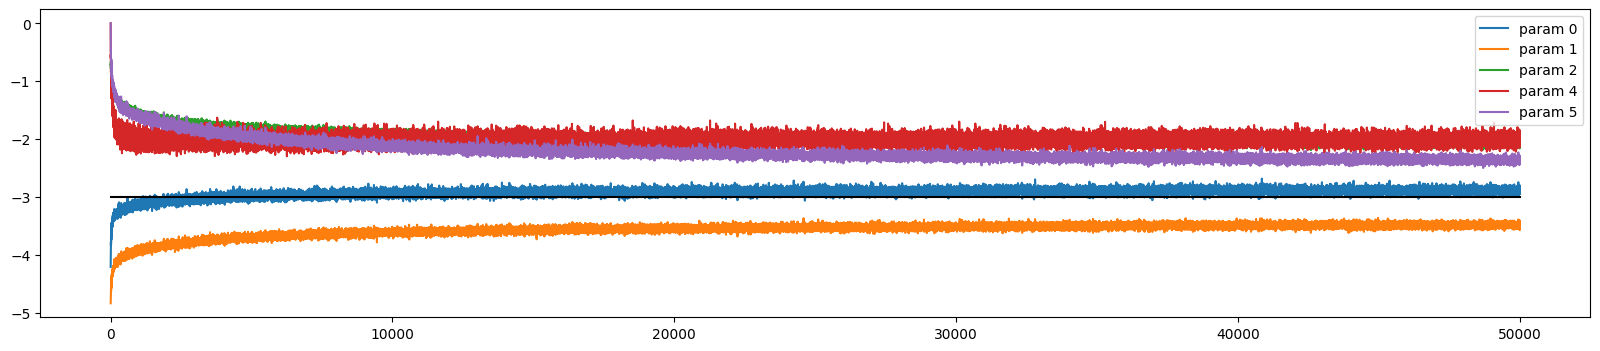

In [53]:
plt.figure(figsize=(20, 4))
legends = []
for i,p in enumerate(parameters):
  if p.ndim == 2:
    plt.plot([ud[j][i] for j in range(len(ud))])
    legends.append('param %d' % i)
plt.plot([0, len(ud)], [-3, -3], 'k') # these ratios should be ~1e-3, indicate on plot
plt.legend(legends);


Other then this activation distribution and gradient distribution are also important visualizations we can use to learn about out NN.

## Sampling

In [49]:
# Sampling from model
g = torch.Generator().manual_seed(2147483647)

for _ in range(30):
    out = []

    context = [0] * block_size # initialize with all ...
    while True:
        emb = C[torch.tensor([context])]

        embed_reshaped = emb.view(-1, N_EMB_SIZE*BLOCK_SIZE)
        h_pre_act = embed_reshaped @ W1 + b1

        h_pre_act = batch_norm_gain * (h_pre_act - batch_norm_mean_running) / batch_norm_std_running + batch_norm_bias
        h = torch.tanh(h_pre_act) # (32,100)

        logits = h @ W2 + b2
        probs = F.softmax(logits, dim=1)
        ix = torch.multinomial(probs, num_samples=1, replacement=True, generator=g).item()
        context = context[1:] + [ix]
        out.append(ix)
        if ix == 0:
            break
    print(''.join(ind_to_str[i] for i in out))

junido.
josalie.
part.
arold.
andie.
leonora.
juen.
burneta.
ernia.
vicie.
boninroie.
lessie.
evy.
arte.
farmunthia.
etma.
rosia.
lean.
jani.
core.
yse.
orett.
janith.
jomiif.
wynn.
sana.
saris.
iro.
sushaddis.
mattie.
